# Real Estate Housing Price Forecast_ Brainstation_Capstone Project_Sprint 3_ Final Delivery V1

## Scope:
Real estate market in the United States for single house families of condo/ coop, and house from 1 bedroom to 5+  bedrooms

## Dataset:
- 523 columns containing typical value in USD for all single-family homes in the respective cities monthly for condo/coops, and homes with 1, 2, 3, 4 and 5+ bedrooms
- 1 columns con containing typical value in USD for all single-family homes in the United States monthly for condo/coops, and homes with 1, 2, 3, 4 and 5+ bedrooms
- Unit Type: Contains if the row value corresponds to condo/coops,  or homes with 1, 2, 3, 4 and 5+ bedrooms
- Date: Contains date, by month
- Int_rate: It is the percent of interest rate for the respective month in US in decimal form
- Pop_Level: Count the population level in US in thousands of Persons
- Work_age_pop Population: Count of working age population in the US
- Emp_Rate: Percentage of employment in the US in decimal form
- GDP: Quarterly measurement of Gross Domestic Product in the US in Billions of USD
- Unemp_rate: Unemplymen rate in the US in decimal form


## Notes: 
- Data was taken from different sources and merged together to see the effect of different factors in single family house predicton

## References:
- https://www.zillow.com/research/data/
- https://fred.stlouisfed.org/tags/series?t=interest+rate%3Bmonthly%3Busa
- https://fred.stlouisfed.org/series/FEDFUNDS
- https://fred.stlouisfed.org/series/GDP
- https://fred.stlouisfed.org/series/CNP16OV
- https://fred.stlouisfed.org/series/LFWA64TTUSM647S
- https://fred.stlouisfed.org/series/EMRATIO

# Notebook:

### 1. Data Preparation

In [1]:
# Importing libraries for notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Reading the dataset in pandas DataFrame

file='231215_Dataset_RE.xlsx'
df = pd.read_excel(file)

In [3]:
# Display the first 5 rows of the dataframe
df.head()

,Unit Type,Date,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA",...,"Spirit Lake, IA","Spencer, IA","Fairfield, IA","Ketchikan, AK",Int_rate,Pop_Level,Work_age_pop,Emp_Rate,GDP,Unemp_Rate
0,1-Bed,2000-01-31,75086.605645,129188.452183,122289.554093,95084.612935,62264.955926,71617.302625,104820.265095,79069.765755,...,78733.541289,33916.118705,NaN,NaN,5.73,211576,1.783433e+08,64.6,10247.720,4.0
1,1-Bed,2000-02-29,75259.564050,129784.886400,122746.963563,95201.983853,62364.801859,71729.454024,104795.186159,79291.056526,...,79213.984063,34102.695657,NaN,NaN,5.85,211772,1.784055e+08,64.6,10247.720,4.1
2,1-Bed,2000-03-31,75474.538148,130338.439231,123435.879710,95500.267635,62125.321876,72014.299621,105057.959551,79456.553941,...,79678.020814,34280.187617,NaN,NaN,6.02,212018,1.785807e+08,64.7,10247.720,4.0
3,1-Bed,2000-04-30,75932.039910,131478.340395,124798.841694,96180.312402,61816.976453,71805.632104,105657.027050,79812.793963,...,80568.293232,34581.576697,NaN,NaN,6.27,212242,1.787272e+08,64.4,10318.165,3.8
4,1-Bed,2000-05-31,76444.698213,132673.203125,126327.945367,97047.521284,61652.154426,71439.201833,106451.332302,80193.347794,...,81211.935509,34968.536718,NaN,NaN,6.53,212466,1.790565e+08,64.5,10318.165,4.0


In [4]:
# Get the shape of the dataset (number of rows, number of columns)
df.shape

(1704, 532)

In [5]:
# Looking at the data types of the dataframe
print(df.dtypes)

Unit Type                  object
Date               datetime64[ns]
United States             float64
New York, NY              float64
Los Angeles, CA           float64
                        ...      
Pop_Level                   int64
Work_age_pop              float64
Emp_Rate                  float64
GDP                       float64
Unemp_Rate                float64
Length: 532, dtype: object


In [6]:
# First, we will see which columns have a significant amount of missing values in our df

# Calculating the sum of null values for each column
null_df_count = df.isnull().sum()

# Calculating the percentage of null values for each column
null_percentages = null_df_count / len(df) * 100

# Sort null sums in descending order
sorted_null_sum = null_df_count.sort_values(ascending=False)

print(sorted_null_sum)

Cadillac, MI        1696
Kearney, NE         1629
Grand Island, NE    1618
Fort Madison, IA    1618
Parkersburg, WV     1612
                    ... 
Sacramento, CA         0
Pittsburgh, PA         0
Cincinnati, OH         0
Austin, TX             0
Unemp_Rate             0
Length: 532, dtype: int64


In [7]:
# Removing columns where the null sum is greater than 5% of the column
columns_to_remove = sorted_null_sum[sorted_null_sum > 0.05 * len(df)].index
df_filtered = df.drop(columns=columns_to_remove)

# Displaying the columns that were removed
print("Columns Removed:")
print(columns_to_remove)


Columns Removed:
Index(['Cadillac, MI', 'Kearney, NE', 'Grand Island, NE', 'Fort Madison, IA',
       'Parkersburg, WV', 'Frankfort, IN', 'Vincennes, IN', 'Storm Lake, IA',
       'Menomonie, WI', 'Taos, NM',
       ...
       'Tallahassee, FL', 'Port St. Lucie, FL', 'Anchorage, AK', 'Trenton, NJ',
       'Salem, OR', 'Santa Maria, CA', 'Visalia, CA', 'York, PA',
       'Vallejo, CA', 'Canton, OH'],
      dtype='object', length=491)


In [8]:
# Displaying the resulting DataFrame
df_filtered.head()

,Unit Type,Date,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA",...,"Austin, TX","Las Vegas, NV","Kansas City, MO","Columbus, OH",Int_rate,Pop_Level,Work_age_pop,Emp_Rate,GDP,Unemp_Rate
0,1-Bed,2000-01-31,75086.605645,129188.452183,122289.554093,95084.612935,62264.955926,71617.302625,104820.265095,79069.765755,...,145228.900051,91205.842593,51064.103171,74696.016516,5.73,211576,1.783433e+08,64.6,10247.720,4.0
1,1-Bed,2000-02-29,75259.564050,129784.886400,122746.963563,95201.983853,62364.801859,71729.454024,104795.186159,79291.056526,...,146153.051858,91238.037453,51454.189130,74760.812706,5.85,211772,1.784055e+08,64.6,10247.720,4.1
2,1-Bed,2000-03-31,75474.538148,130338.439231,123435.879710,95500.267635,62125.321876,72014.299621,105057.959551,79456.553941,...,147112.372428,91297.953215,51731.898454,74958.507866,6.02,212018,1.785807e+08,64.7,10247.720,4.0
3,1-Bed,2000-04-30,75932.039910,131478.340395,124798.841694,96180.312402,61816.976453,71805.632104,105657.027050,79812.793963,...,149546.720693,91529.996221,52144.570493,75194.186677,6.27,212242,1.787272e+08,64.4,10318.165,3.8
4,1-Bed,2000-05-31,76444.698213,132673.203125,126327.945367,97047.521284,61652.154426,71439.201833,106451.332302,80193.347794,...,151873.536919,91816.933380,52286.732465,75368.552732,6.53,212466,1.790565e+08,64.5,10318.165,4.0


In [9]:
# Re-calculating the sum of null values for each column on the filtered data frame
filtered_null_df_count = df_filtered.isnull().sum()
# Sorting null sums in descending order for the filtered dataframe
filtered_sorted_null_sum = null_df_count.sort_values(ascending=False)

print(filtered_sorted_null_sum)

Cadillac, MI        1696
Kearney, NE         1629
Grand Island, NE    1618
Fort Madison, IA    1618
Parkersburg, WV     1612
                    ... 
Sacramento, CA         0
Pittsburgh, PA         0
Cincinnati, OH         0
Austin, TX             0
Unemp_Rate             0
Length: 532, dtype: int64


In [10]:
## Looking at the remaining percentage of null values

# # Display the DataFrame after interpolation
print((df_filtered.isnull().mean()*100).sort_values(ascending=False))

## As the maximum percentage of remaining values is 0.4%, it is considered insignificant. Therefore, the columns will be analyzed like this

Phoenix, AZ          0.410798
Dallas, TX           0.234742
Las Vegas, NV        0.176056
Kansas City, MO      0.117371
Orlando, FL          0.058685
San Antonio, TX      0.058685
San Francisco, CA    0.058685
Unit Type            0.000000
Charlotte, NC        0.000000
Portland, OR         0.000000
Sacramento, CA       0.000000
Pittsburgh, PA       0.000000
Austin, TX           0.000000
Cincinnati, OH       0.000000
Baltimore, MD        0.000000
Columbus, OH         0.000000
Int_rate             0.000000
Pop_Level            0.000000
Work_age_pop         0.000000
Emp_Rate             0.000000
GDP                  0.000000
St. Louis, MO        0.000000
Tampa, FL            0.000000
Denver, CO           0.000000
Date                 0.000000
United States        0.000000
New York, NY         0.000000
Los Angeles, CA      0.000000
Chicago, IL          0.000000
Houston, TX          0.000000
Washington, DC       0.000000
Philadelphia, PA     0.000000
Miami, FL            0.000000
Atlanta, G

In [11]:
## Transforming data set to get Y variable:

# The data set goal is to predict the hosing pricing at a national level and at a city level.
# Therefore, we will put all the  locations -cities and US pricing- coulumns into one. The we will analyse the nation and cities separately.

# Specifying the columns to use as index columns
index_columns = ['Unit Type', 'Date', 'Int_rate', 'GDP', 'Pop_Level','Work_age_pop', 'Emp_Rate', 'Unemp_Rate' ]

# List of columns to stack
columns_to_stack = [col for col in df_filtered.columns if col not in index_columns]

# Use of melt function to stack the specified columns into a single column
stacked_df = pd.melt(df_filtered, id_vars=index_columns, value_vars=columns_to_stack, var_name='Location', value_name='single-family home')

In [12]:
# Looking at the shape of the new stacked dataframe
stacked_df.shape

(56232, 10)

In [13]:
# Observing the first 20 rows of the stacked dataframe
stacked_df.head(20)

,Unit Type,Date,Int_rate,GDP,Pop_Level,Work_age_pop,Emp_Rate,Unemp_Rate,Location,single-family home
0,1-Bed,2000-01-31,5.73,10247.720,211576,1.783433e+08,64.6,4.0,United States,75086.605645
1,1-Bed,2000-02-29,5.85,10247.720,211772,1.784055e+08,64.6,4.1,United States,75259.564050
2,1-Bed,2000-03-31,6.02,10247.720,212018,1.785807e+08,64.7,4.0,United States,75474.538148
3,1-Bed,2000-04-30,6.27,10318.165,212242,1.787272e+08,64.4,3.8,United States,75932.039910
4,1-Bed,2000-05-31,6.53,10318.165,212466,1.790565e+08,64.5,4.0,United States,76444.698213
5,1-Bed,2000-06-30,6.54,10318.165,212677,1.793240e+08,64.2,4.0,United States,76995.669935
6,1-Bed,2000-07-31,6.50,10435.744,212916,1.793947e+08,64.2,4.0,United States,77586.505300
7,1-Bed,2000-08-31,6.52,10435.744,213163,1.795656e+08,64.2,4.1,United States,78238.792605
8,1-Bed,2000-09-30,6.51,10435.744,213405,1.797542e+08,64.2,3.9,United States,78925.223119
9,1-Bed,2000-10-31,6.51,10470.231,213540,1.799285e+08,64.3,3.9,United States,79598.555014


In [14]:
# Now, we will separate the " date" column to obtain the month and year, this will help to process the date data in the ML model
stacked_df['year']= stacked_df['Date'].dt.year
stacked_df['month']= stacked_df['Date'].dt.month


In [15]:
# dropping original date column
stacked_df.drop(columns=['Date'], inplace=True)

In [16]:
# Observing the first 20 rows of the stacked dataframe
stacked_df.head(20)

,Unit Type,Int_rate,GDP,Pop_Level,Work_age_pop,Emp_Rate,Unemp_Rate,Location,single-family home,year,month
0,1-Bed,5.73,10247.720,211576,1.783433e+08,64.6,4.0,United States,75086.605645,2000,1
1,1-Bed,5.85,10247.720,211772,1.784055e+08,64.6,4.1,United States,75259.564050,2000,2
2,1-Bed,6.02,10247.720,212018,1.785807e+08,64.7,4.0,United States,75474.538148,2000,3
3,1-Bed,6.27,10318.165,212242,1.787272e+08,64.4,3.8,United States,75932.039910,2000,4
4,1-Bed,6.53,10318.165,212466,1.790565e+08,64.5,4.0,United States,76444.698213,2000,5
5,1-Bed,6.54,10318.165,212677,1.793240e+08,64.2,4.0,United States,76995.669935,2000,6
6,1-Bed,6.50,10435.744,212916,1.793947e+08,64.2,4.0,United States,77586.505300,2000,7
7,1-Bed,6.52,10435.744,213163,1.795656e+08,64.2,4.1,United States,78238.792605,2000,8
8,1-Bed,6.51,10435.744,213405,1.797542e+08,64.2,3.9,United States,78925.223119,2000,9
9,1-Bed,6.51,10470.231,213540,1.799285e+08,64.3,3.9,United States,79598.555014,2000,10


In [17]:
## Transforming categorical varaibles to numerical for further analysis:

# We will encode the "unit type" column using the ordinal encoding method

nation_ordinal_mapping = {'1-Bed': 1, '2-Bed': 2, '3-Bed': 3,'4-Bed': 4, '5-Bed': 5, 'Condo/Co-op': 6}
stacked_df['Unit Type'] = stacked_df['Unit Type'].map(nation_ordinal_mapping)


In [18]:
# Observing the first 20 rows of the stacked dataframe
stacked_df.head(20)

,Unit Type,Int_rate,GDP,Pop_Level,Work_age_pop,Emp_Rate,Unemp_Rate,Location,single-family home,year,month
0,1,5.73,10247.720,211576,1.783433e+08,64.6,4.0,United States,75086.605645,2000,1
1,1,5.85,10247.720,211772,1.784055e+08,64.6,4.1,United States,75259.564050,2000,2
2,1,6.02,10247.720,212018,1.785807e+08,64.7,4.0,United States,75474.538148,2000,3
3,1,6.27,10318.165,212242,1.787272e+08,64.4,3.8,United States,75932.039910,2000,4
4,1,6.53,10318.165,212466,1.790565e+08,64.5,4.0,United States,76444.698213,2000,5
5,1,6.54,10318.165,212677,1.793240e+08,64.2,4.0,United States,76995.669935,2000,6
6,1,6.50,10435.744,212916,1.793947e+08,64.2,4.0,United States,77586.505300,2000,7
7,1,6.52,10435.744,213163,1.795656e+08,64.2,4.1,United States,78238.792605,2000,8
8,1,6.51,10435.744,213405,1.797542e+08,64.2,3.9,United States,78925.223119,2000,9
9,1,6.51,10470.231,213540,1.799285e+08,64.3,3.9,United States,79598.555014,2000,10


In [19]:
print(stacked_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56232 entries, 0 to 56231
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unit Type           56232 non-null  int64  
 1   Int_rate            56232 non-null  float64
 2   GDP                 56232 non-null  float64
 3   Pop_Level           56232 non-null  int64  
 4   Work_age_pop        56232 non-null  float64
 5   Emp_Rate            56232 non-null  float64
 6   Unemp_Rate          56232 non-null  float64
 7   Location            56232 non-null  object 
 8   single-family home  56213 non-null  float64
 9   year                56232 non-null  int32  
 10  month               56232 non-null  int32  
dtypes: float64(6), int32(2), int64(2), object(1)
memory usage: 4.3+ MB
None


In [20]:
# Checkin count of nan values
null_stacked_counts = stacked_df.isnull().sum()

print(null_stacked_counts)

Unit Type              0
Int_rate               0
GDP                    0
Pop_Level              0
Work_age_pop           0
Emp_Rate               0
Unemp_Rate             0
Location               0
single-family home    19
year                   0
month                  0
dtype: int64


In [21]:
# Dropping null values on the stacked dataframe

stacked_df=stacked_df.dropna()

In [22]:
# Checkin count of nan values
null_stacked_counts = stacked_df.isnull().sum()

print(null_stacked_counts)

stacked_df.shape

Unit Type             0
Int_rate              0
GDP                   0
Pop_Level             0
Work_age_pop          0
Emp_Rate              0
Unemp_Rate            0
Location              0
single-family home    0
year                  0
month                 0
dtype: int64


(56213, 11)

In [23]:
# Now, we will divide the stacked_df into two new dataframes, one will contain only data related to United States,
# the second dataframe will have all cities.

condition= stacked_df['Location'] == 'United States'

nation_df=stacked_df[condition]

cities_df=stacked_df[~condition]

In [24]:
# Observing the descripotion of nation dataframe
nation_df.describe(include ='all')


,Unit Type,Int_rate,GDP,Pop_Level,Work_age_pop,Emp_Rate,Unemp_Rate,Location,single-family home,year,month
count,1704.000000,1704.00000,1704.000000,1704.000000,1.704000e+03,1704.000000,1704.000000,1704,1704.000000,1704.000000,1704.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1704,NaN,NaN,NaN
mean,3.500000,1.73493,16877.840831,241055.257042,1.981265e+08,60.596831,5.793310,NaN,226411.066770,2011.338028,6.443662
std,1.708326,1.91416,4588.277177,16149.165463,8.564563e+06,2.122945,1.965872,NaN,112441.083127,6.835939,3.441704
min,1.000000,0.05000,10247.720000,211576.000000,1.783433e+08,51.300000,3.400000,NaN,75086.605645,2000.000000,1.000000
25%,2.000000,0.14000,13599.160000,227521.000000,1.922998e+08,58.800000,4.400000,NaN,145288.611412,2005.000000,3.000000
50%,3.500000,1.03000,16068.805000,240512.500000,2.004373e+08,60.250000,5.300000,NaN,191852.837798,2011.000000,6.000000
75%,5.000000,2.49250,19944.129250,255811.750000,2.054648e+08,62.500000,6.700000,NaN,282271.333051,2017.000000,9.000000


In [25]:
# Dropping location column in nation_df as it is only one value- US
nation_df.drop(columns='Location', inplace=True)

C:\Users\ClearPoint1\AppData\Local\Temp\ipykernel_13792\474339218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nation_df.drop(columns='Location', inplace=True)


In [26]:
# Observing final
nation_df.describe(include='all')

,Unit Type,Int_rate,GDP,Pop_Level,Work_age_pop,Emp_Rate,Unemp_Rate,single-family home,year,month
count,1704.000000,1704.00000,1704.000000,1704.000000,1.704000e+03,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,3.500000,1.73493,16877.840831,241055.257042,1.981265e+08,60.596831,5.793310,226411.066770,2011.338028,6.443662
std,1.708326,1.91416,4588.277177,16149.165463,8.564563e+06,2.122945,1.965872,112441.083127,6.835939,3.441704
min,1.000000,0.05000,10247.720000,211576.000000,1.783433e+08,51.300000,3.400000,75086.605645,2000.000000,1.000000
25%,2.000000,0.14000,13599.160000,227521.000000,1.922998e+08,58.800000,4.400000,145288.611412,2005.000000,3.000000
50%,3.500000,1.03000,16068.805000,240512.500000,2.004373e+08,60.250000,5.300000,191852.837798,2011.000000,6.000000
75%,5.000000,2.49250,19944.129250,255811.750000,2.054648e+08,62.500000,6.700000,282271.333051,2017.000000,9.000000
max,6.000000,6.54000,27644.463000,267428.000000,2.091172e+08,64.700000,14.700000,687009.435834,2023.000000,12.000000


In [27]:
# Observing the descripotion of cities dataframe
cities_df.describe(include ='all')

,Unit Type,Int_rate,GDP,Pop_Level,Work_age_pop,Emp_Rate,Unemp_Rate,Location,single-family home,year,month
count,54509.000000,54509.000000,54509.000000,54509.000000,5.450900e+04,54509.000000,54509.000000,54509,5.450900e+04,54509.000000,54509.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1704,NaN,NaN,NaN
mean,3.499936,1.734989,16879.329183,241061.025005,1.981295e+08,60.596280,5.793280,NaN,2.708231e+05,2011.340421,6.444055
std,1.707887,1.913854,4587.062312,16144.318988,8.562049e+06,2.122441,1.965559,NaN,1.918322e+05,6.833949,3.440807
min,1.000000,0.050000,10247.720000,211576.000000,1.783433e+08,51.300000,3.400000,NaN,4.095022e+04,2000.000000,1.000000
25%,2.000000,0.140000,13599.160000,227553.000000,1.923512e+08,58.800000,4.400000,NaN,1.354789e+05,2005.000000,3.000000
50%,3.000000,1.030000,16068.805000,240584.000000,2.004563e+08,60.200000,5.300000,NaN,2.215796e+05,2011.000000,6.000000
75%,5.000000,2.500000,20037.088000,255949.000000,2.055024e+08,62.500000,6.700000,NaN,3.457348e+05,2017.000000,9.000000


In [28]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54509 entries, 1704 to 56231
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unit Type           54509 non-null  int64  
 1   Int_rate            54509 non-null  float64
 2   GDP                 54509 non-null  float64
 3   Pop_Level           54509 non-null  int64  
 4   Work_age_pop        54509 non-null  float64
 5   Emp_Rate            54509 non-null  float64
 6   Unemp_Rate          54509 non-null  float64
 7   Location            54509 non-null  object 
 8   single-family home  54509 non-null  float64
 9   year                54509 non-null  int32  
 10  month               54509 non-null  int32  
dtypes: float64(6), int32(2), int64(2), object(1)
memory usage: 4.6+ MB


In [29]:
## Now we will encode the location columns for ML modeling

# We will use the Label Encoding,wichi assigns a unique integer ot each category-location- in the column 
from sklearn.preprocessing import LabelEncoder

# Fit and transform the categorical column
le = LabelEncoder()
# cities_df['Location'] = le.fit_transform(cities_df['Location'])

cities_df['loc_encoded'] = le.fit_transform(cities_df['Location'])


C:\Users\ClearPoint1\AppData\Local\Temp\ipykernel_13792\4020208215.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df['loc_encoded'] = le.fit_transform(cities_df['Location'])


In [30]:
# Verifying the description of cities dataframe
cities_df.describe(include ='all')

,Unit Type,Int_rate,GDP,Pop_Level,Work_age_pop,Emp_Rate,Unemp_Rate,Location,single-family home,year,month,loc_encoded
count,54509.000000,54509.000000,54509.000000,54509.000000,5.450900e+04,54509.000000,54509.000000,54509,5.450900e+04,54509.000000,54509.000000,54509.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY",NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1704,NaN,NaN,NaN,NaN
mean,3.499936,1.734989,16879.329183,241061.025005,1.981295e+08,60.596280,5.793280,NaN,2.708231e+05,2011.340421,6.444055,15.499807
std,1.707887,1.913854,4587.062312,16144.318988,8.562049e+06,2.122441,1.965559,NaN,1.918322e+05,6.833949,3.440807,9.234152
min,1.000000,0.050000,10247.720000,211576.000000,1.783433e+08,51.300000,3.400000,NaN,4.095022e+04,2000.000000,1.000000,0.000000
25%,2.000000,0.140000,13599.160000,227553.000000,1.923512e+08,58.800000,4.400000,NaN,1.354789e+05,2005.000000,3.000000,7.000000
50%,3.000000,1.030000,16068.805000,240584.000000,2.004563e+08,60.200000,5.300000,NaN,2.215796e+05,2011.000000,6.000000,15.000000
75%,5.000000,2.500000,20037.088000,255949.000000,2.055024e+08,62.500000,6.700000,NaN,3.457348e+05,2017.000000,9.000000,24.000000


In [31]:
# # Creating a reference list for mapping encoded integers to original values

loctation_ref = cities_df[['Location', 'loc_encoded']]

# Extract unique values from 'location' along
unique_loc_ref = loctation_ref.drop_duplicates(subset='Location')

# Display the DataFrame with encoded values and the reference list
print("Location encoding reference:")
print(unique_loc_ref.sort_values(by='loc_encoded'))

Location encoding reference:
                Location  loc_encoded
15336        Atlanta, GA            0
49416         Austin, TX            1
34080      Baltimore, MD            2
17040         Boston, MA            3
39192      Charlotte, NC            4
5112         Chicago, IL            5
47712     Cincinnati, OH            6
54528       Columbus, OH            7
6816          Dallas, TX            8
32376         Denver, CO            9
23856        Detroit, MI           10
8520         Houston, TX           11
52824    Kansas City, MO           12
51120      Las Vegas, NV           13
3408     Los Angeles, CA           14
13632          Miami, FL           15
27264    Minneapolis, MN           16
1704        New York, NY           17
37488        Orlando, FL           18
11928   Philadelphia, PA           19
18744        Phoenix, AZ           20
46008     Pittsburgh, PA           21
42600       Portland, OR           22
22152      Riverside, CA           23
44304     Sacramento,

In [32]:
# Finally, we will drop the location column in cities_df as it has been encoded and we have a list to reference the integer
# to the original value

cities_df.drop(columns='Location', inplace=True)

C:\Users\ClearPoint1\AppData\Local\Temp\ipykernel_13792\1762309854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df.drop(columns='Location', inplace=True)


In [33]:
# Verifying final cities dataframe
cities_df.describe(include ='all')

,Unit Type,Int_rate,GDP,Pop_Level,Work_age_pop,Emp_Rate,Unemp_Rate,single-family home,year,month,loc_encoded
count,54509.000000,54509.000000,54509.000000,54509.000000,5.450900e+04,54509.000000,54509.000000,5.450900e+04,54509.000000,54509.000000,54509.000000
mean,3.499936,1.734989,16879.329183,241061.025005,1.981295e+08,60.596280,5.793280,2.708231e+05,2011.340421,6.444055,15.499807
std,1.707887,1.913854,4587.062312,16144.318988,8.562049e+06,2.122441,1.965559,1.918322e+05,6.833949,3.440807,9.234152
min,1.000000,0.050000,10247.720000,211576.000000,1.783433e+08,51.300000,3.400000,4.095022e+04,2000.000000,1.000000,0.000000
25%,2.000000,0.140000,13599.160000,227553.000000,1.923512e+08,58.800000,4.400000,1.354789e+05,2005.000000,3.000000,7.000000
50%,3.000000,1.030000,16068.805000,240584.000000,2.004563e+08,60.200000,5.300000,2.215796e+05,2011.000000,6.000000,15.000000
75%,5.000000,2.500000,20037.088000,255949.000000,2.055024e+08,62.500000,6.700000,3.457348e+05,2017.000000,9.000000,24.000000
max,6.000000,6.540000,27644.463000,267428.000000,2.091172e+08,64.700000,14.700000,2.131263e+06,2023.000000,12.000000,31.000000


### Comments: 

Up to this point, we have dealt with null values and the data set has been re-structured to have all the pricing in one column and the dataframe was divided in two to look at the forcast at a high level (nation) and at a lower level ( cities)

In the next section, we will process to perform EDA for each dataframe

### 2. Exploratory Data Analysis

### 2.1 nation_df EDA:

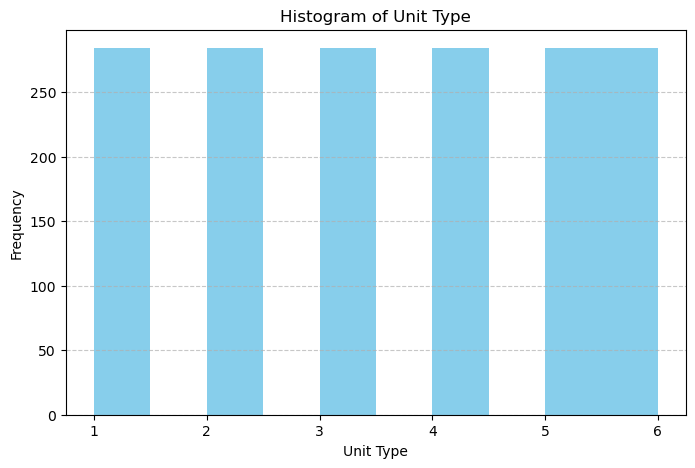

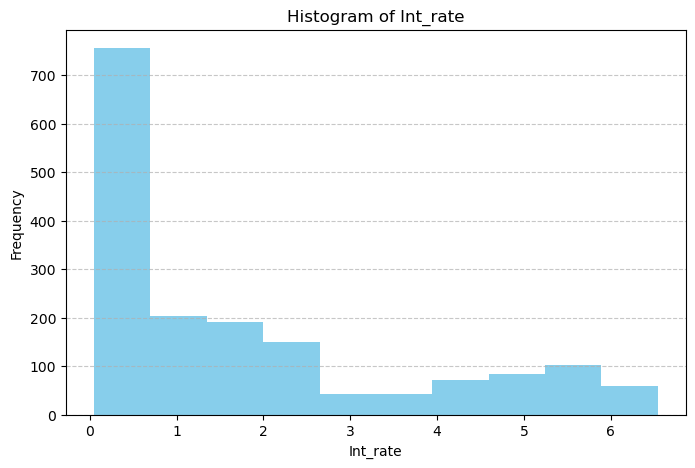

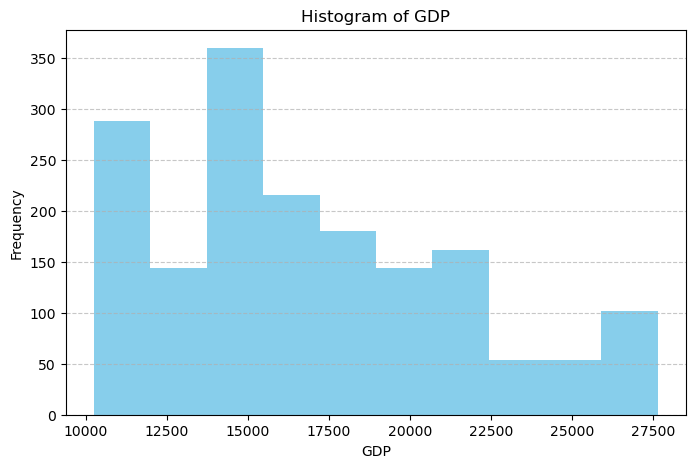

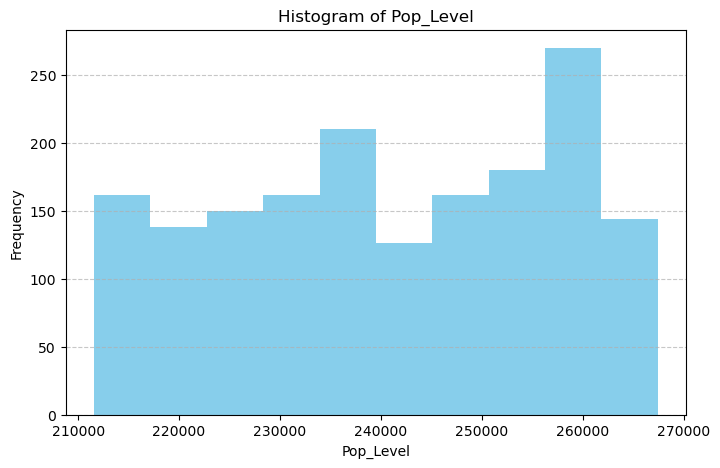

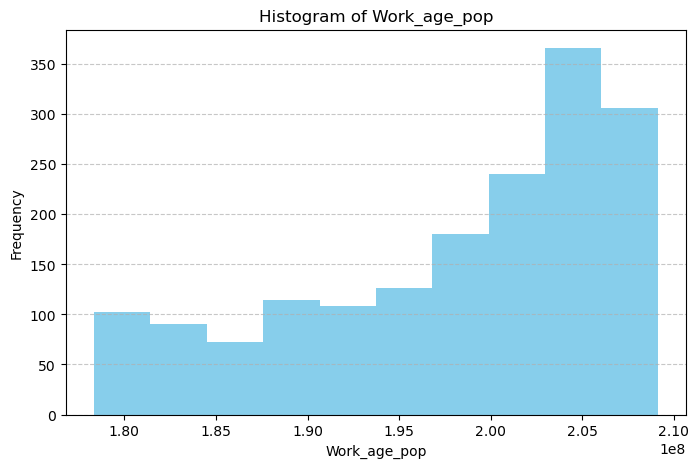

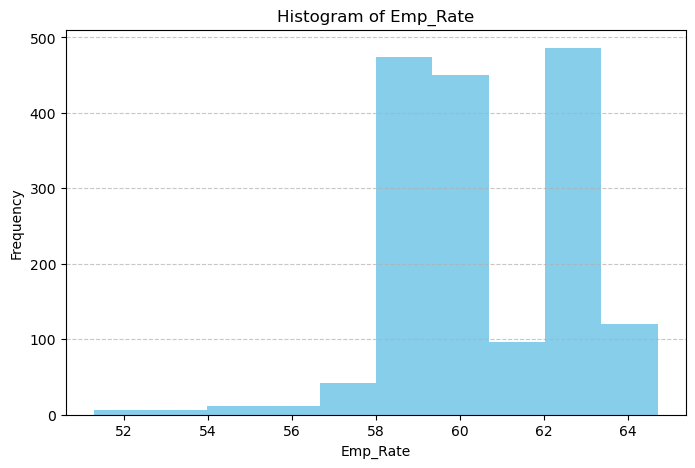

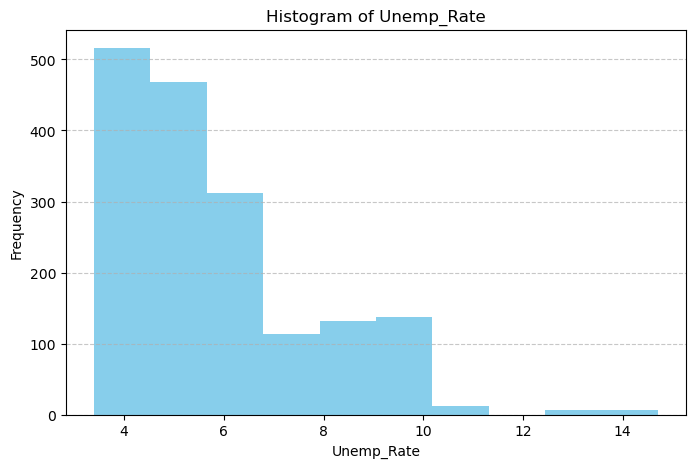

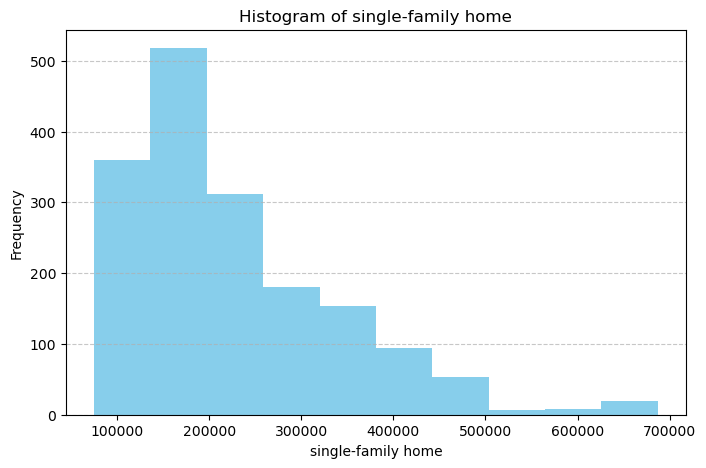

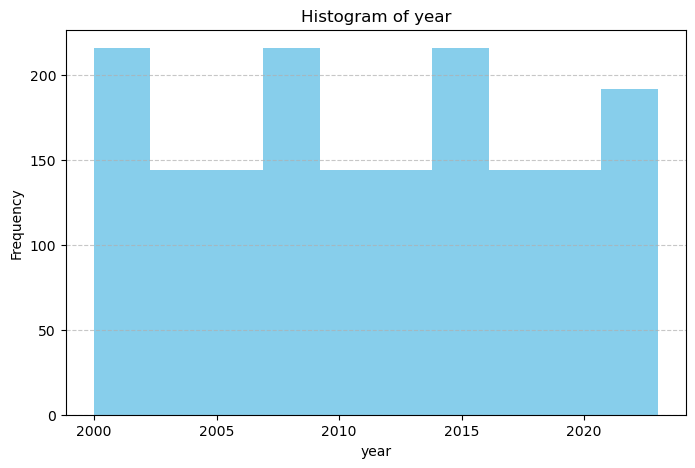

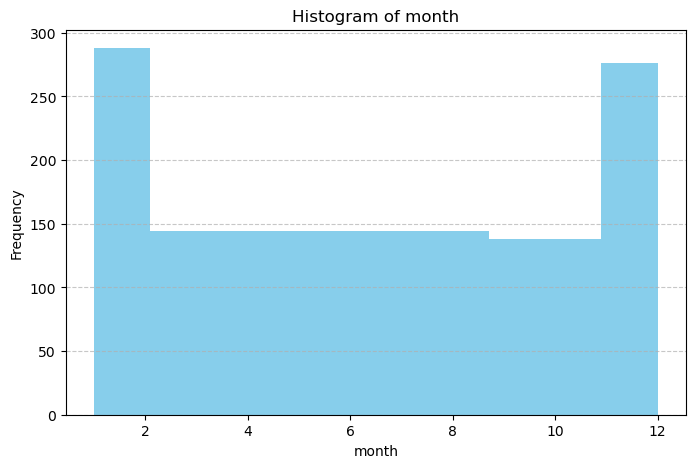

In [34]:
## Univariate Analysis- Histograms 

# First, we will start creating histograms for all numerical variables
# Getting the list of numerical column names
nation_numeric_columns = nation_df.select_dtypes(include=[int, float]).columns

# Create histograms for each numerical column
for column in nation_numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(nation_df[column], bins=10, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

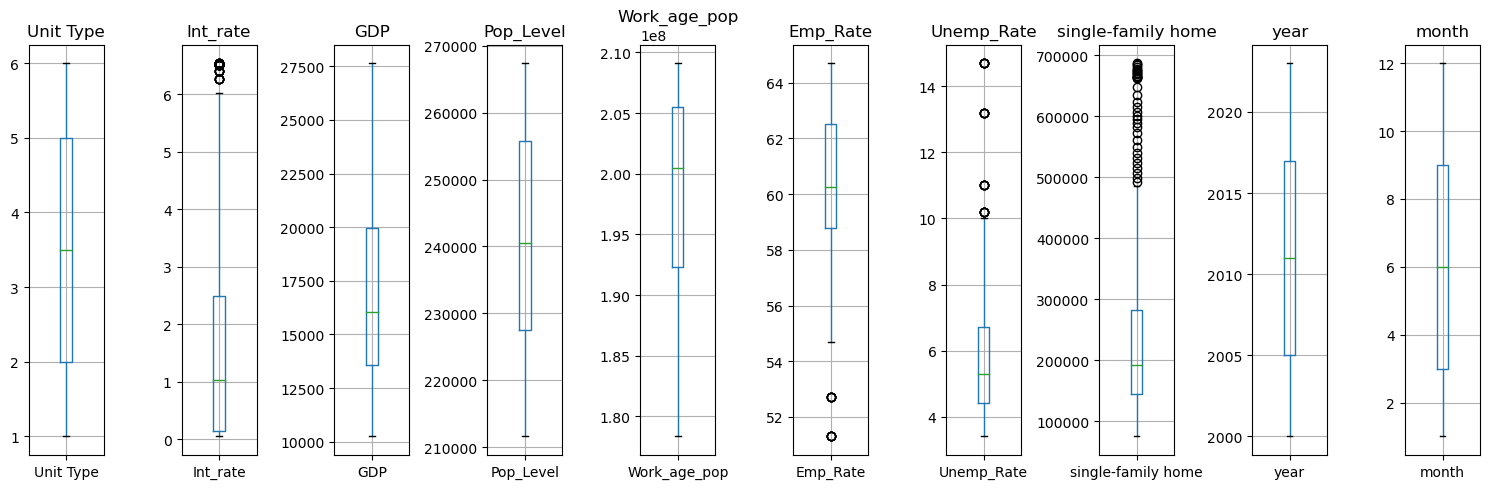

In [35]:
## Univariate Analysis- Box Plots
## Now, we will create box plots for all numerical varaibles in nation_df

# Creating subplots for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(nation_numeric_columns), figsize=(15, 5))

# Loop through numerical columns and create boxplots
for i, column in enumerate(nation_numeric_columns):
    ax = axes[i]
    nation_df.boxplot(column=column, ax=ax)
    ax.set_title(column)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

#### Observations: 
1. Interest rates and single-family home value have a right skewed distribution as well as a greater number of outliers

In [36]:
## Selecting target variable for next steps:

# Split the nation_df into features (X_n) and target variable (y_n)
X_n = nation_df.drop('single-family home', axis=1)
y_n = nation_df['single-family home']

print(X_n.info())
print(y_n)

<class 'pandas.core.frame.DataFrame'>
Index: 1704 entries, 0 to 1703
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unit Type     1704 non-null   int64  
 1   Int_rate      1704 non-null   float64
 2   GDP           1704 non-null   float64
 3   Pop_Level     1704 non-null   int64  
 4   Work_age_pop  1704 non-null   float64
 5   Emp_Rate      1704 non-null   float64
 6   Unemp_Rate    1704 non-null   float64
 7   year          1704 non-null   int32  
 8   month         1704 non-null   int32  
dtypes: float64(5), int32(2), int64(2)
memory usage: 119.8 KB
None
0        75086.605645
1        75259.564050
2        75474.538148
3        75932.039910
4        76444.698213
            ...      
1699    335738.140488
1700    336844.930040
1701    338667.908106
1702    340592.803242
1703    342687.843779
Name: single-family home, Length: 1704, dtype: float64


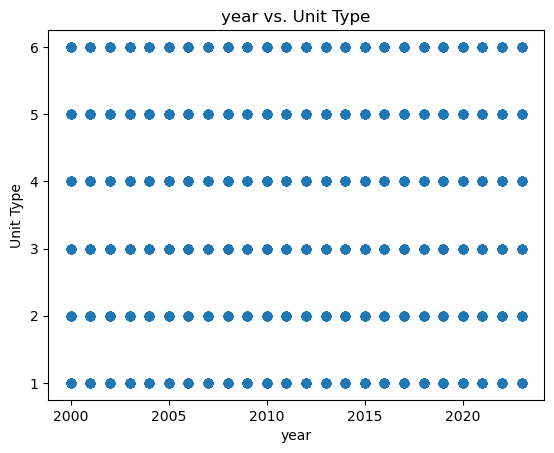

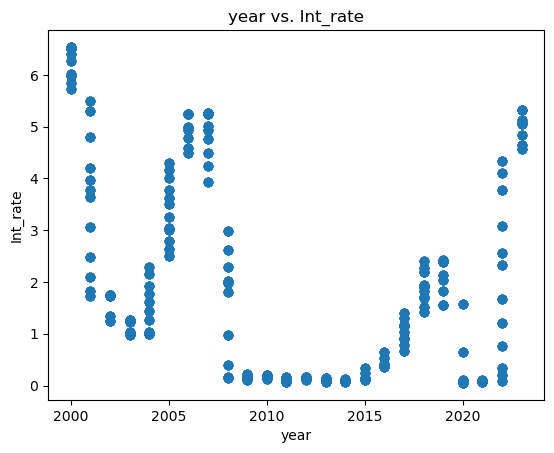

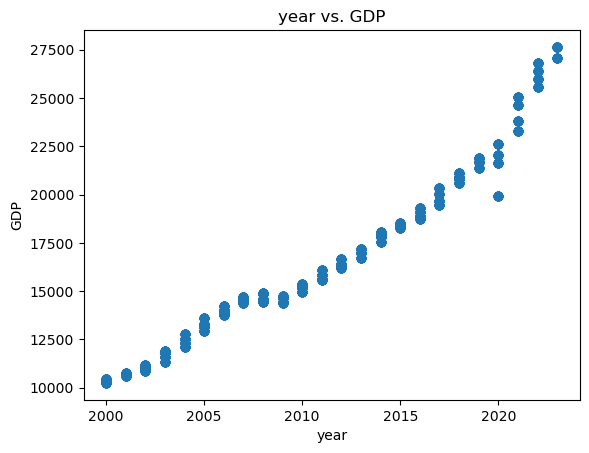

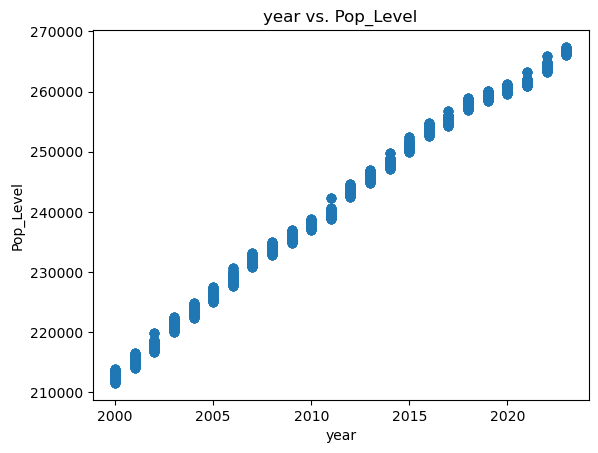

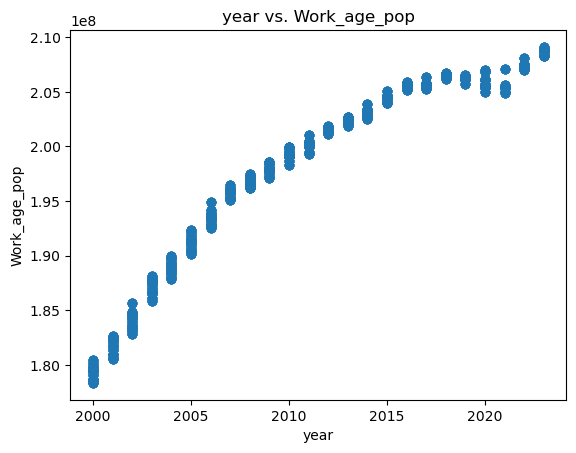

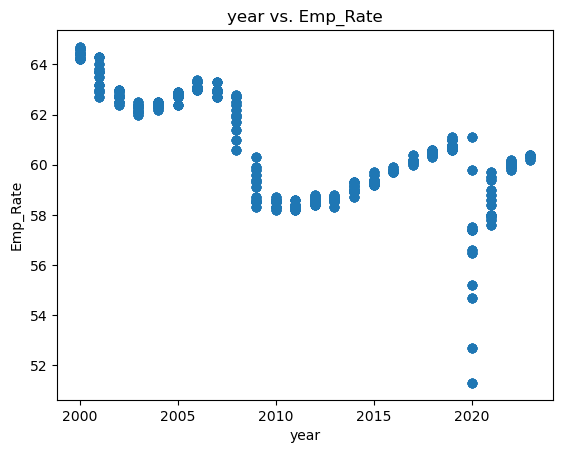

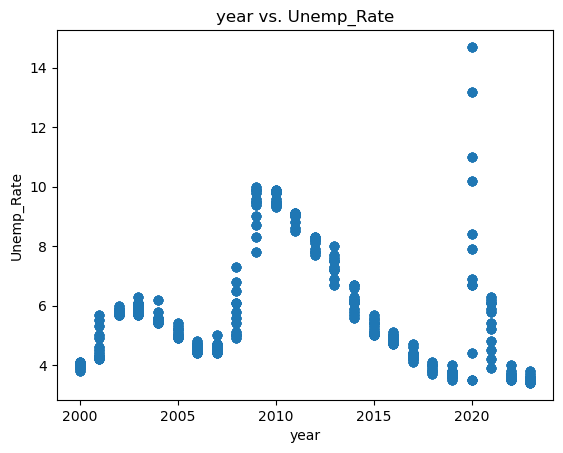

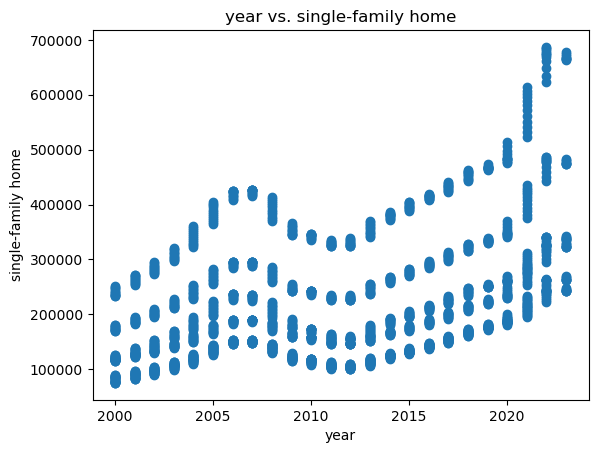

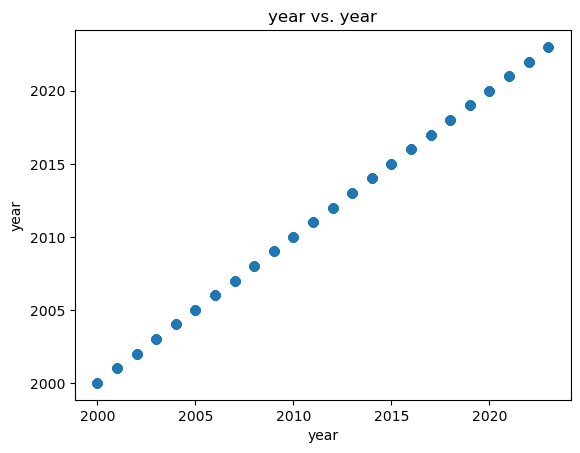

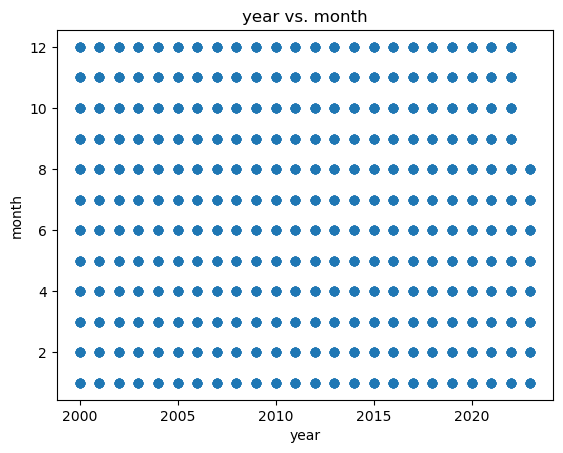

In [37]:
## Performing bivariate analysis:

# We will create scatter plots to observe all numerical values Vs the date

# Create scatter plots for each numerical column against the date
for column in nation_numeric_columns:
    plt.scatter(nation_df['year'], nation_df[column])
    plt.xlabel('year')
    plt.ylabel(column)
    plt.title(f'year vs. {column}')
    plt.show()


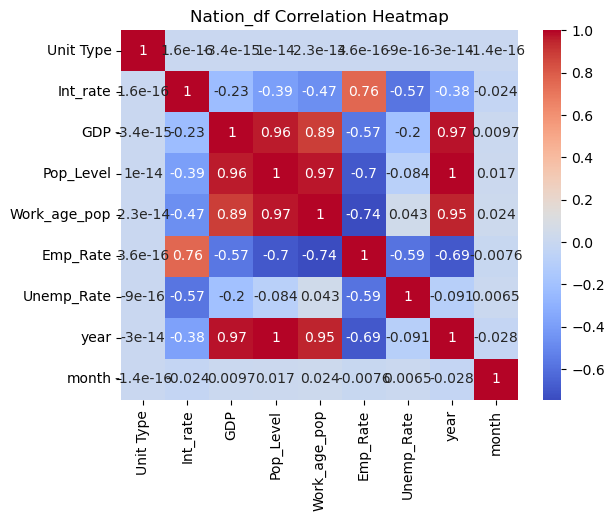

In [38]:
# now, we will perform a correlation matrix between the independent variables to see if there is any potentical colinearity
correlation_matrix_nation = X_n.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix_nation, annot=True, cmap='coolwarm')
plt.title('Nation_df Correlation Heatmap')
plt.show()

In [39]:
# Droppping columns to avoding colinearlity
nation_columns_to_drop = ['Work_age_pop', 'Emp_Rate', 'Pop_Level','year']

# Drop the specified columns
X_n.drop(columns=nation_columns_to_drop, inplace=True)

# Display the DataFrame after dropping the columns
print(X_n)


      Unit Type  Int_rate        GDP  Unemp_Rate  month
0             1      5.73  10247.720         4.0      1
1             1      5.85  10247.720         4.1      2
2             1      6.02  10247.720         4.0      3
3             1      6.27  10318.165         3.8      4
4             1      6.53  10318.165         4.0      5
...         ...       ...        ...         ...    ...
1699          6      5.06  27644.463         3.4      4
1700          6      5.08  27644.463         3.7      5
1701          6      5.12  27644.463         3.6      6
1702          6      5.33  27644.463         3.5      7
1703          6      5.33  27644.463         3.8      8

[1704 rows x 5 columns]


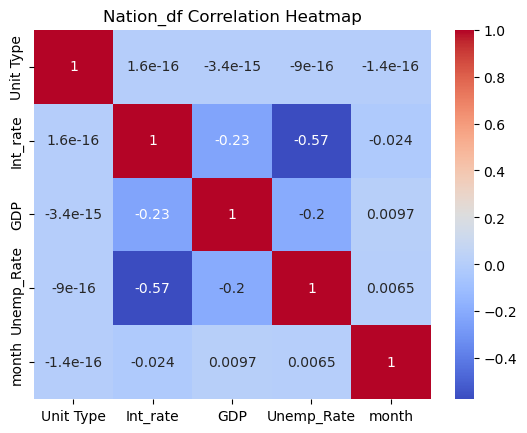

In [40]:
# now, we will perform a correlation matrix between the independent variables to see if there is any potentical colinearity
correlation_matrix_nation = X_n.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix_nation, annot=True, cmap='coolwarm')
plt.title('Nation_df Correlation Heatmap')
plt.show()

In [174]:
X_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1704 entries, 0 to 1703
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unit Type   1704 non-null   int64  
 1   Int_rate    1704 non-null   float64
 2   GDP         1704 non-null   float64
 3   Unemp_Rate  1704 non-null   float64
 4   month       1704 non-null   int32  
dtypes: float64(3), int32(1), int64(1)
memory usage: 73.2 KB


### 2.2 cities_df EDA:

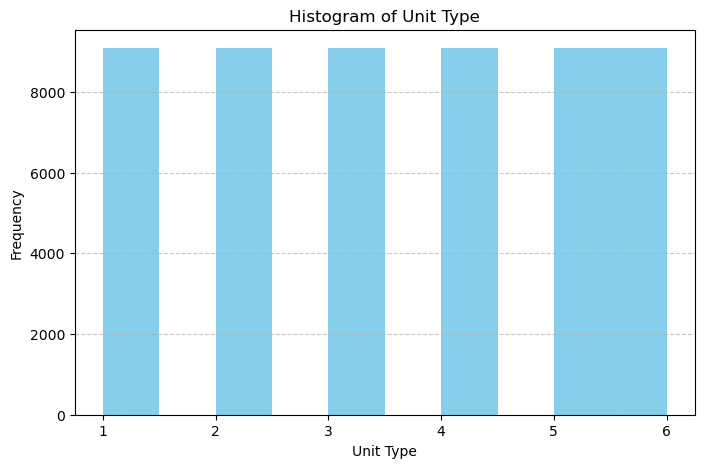

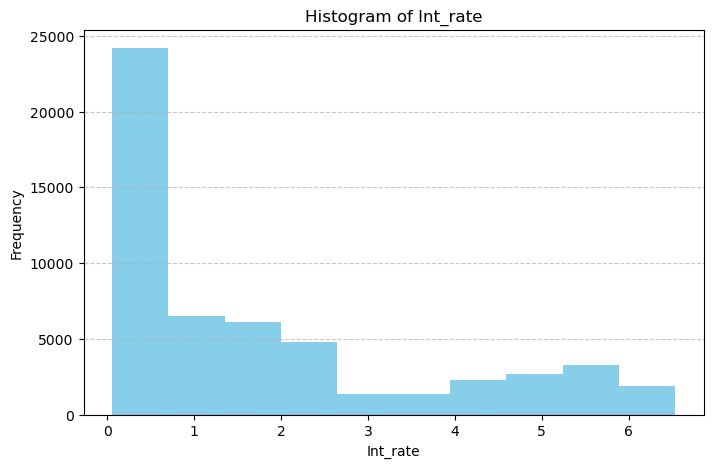

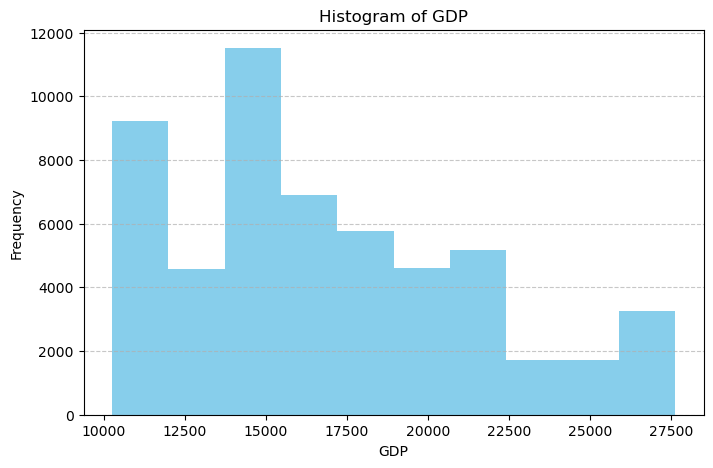

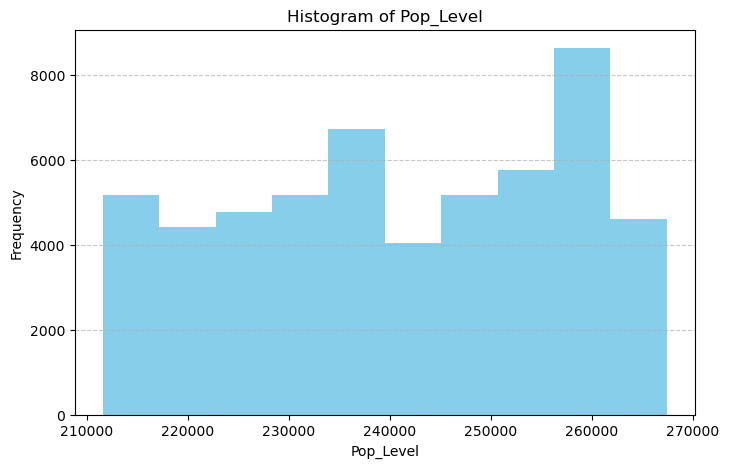

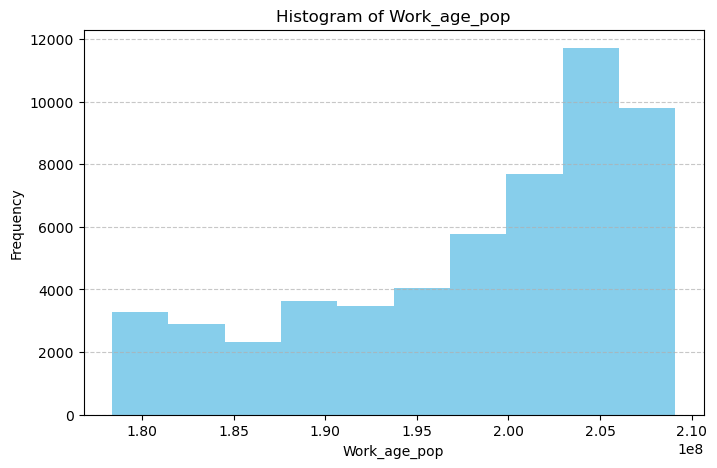

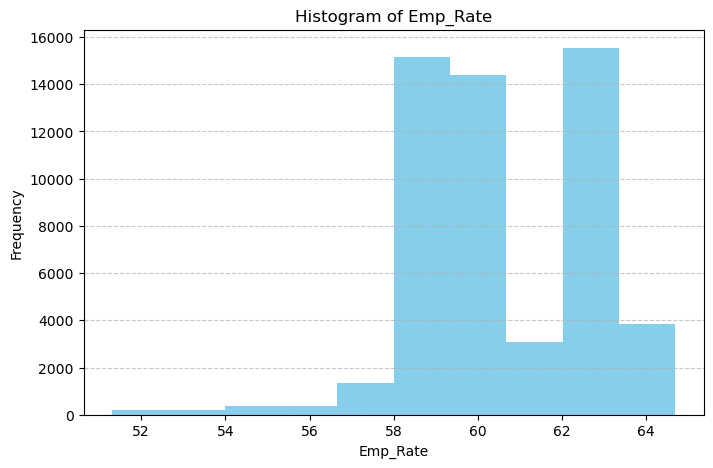

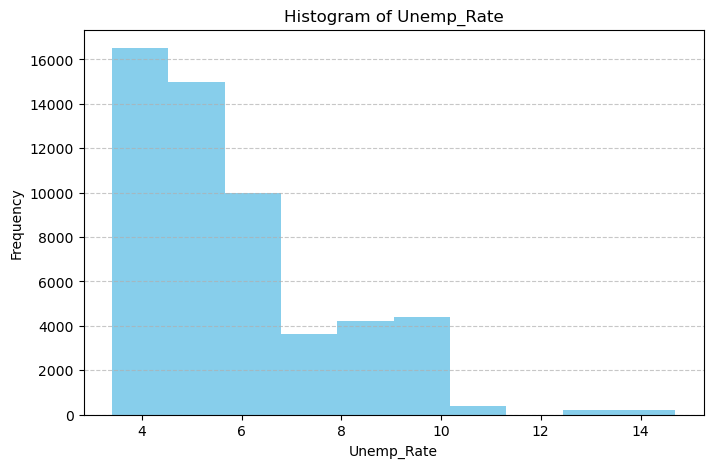

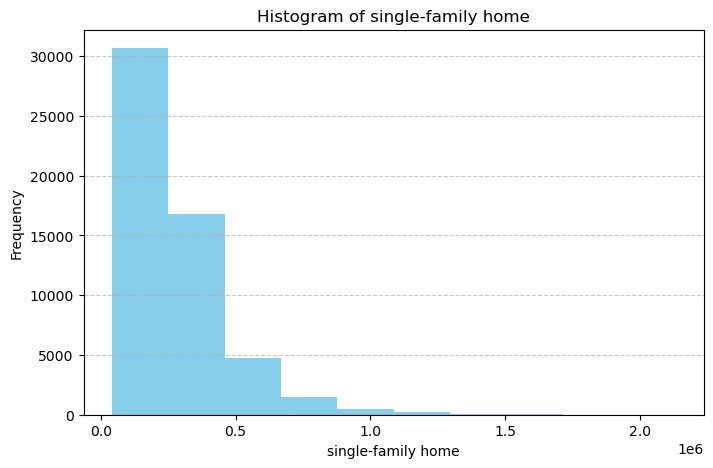

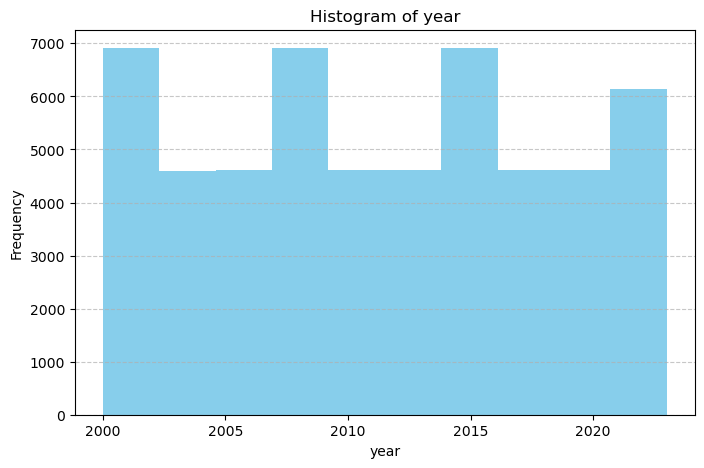

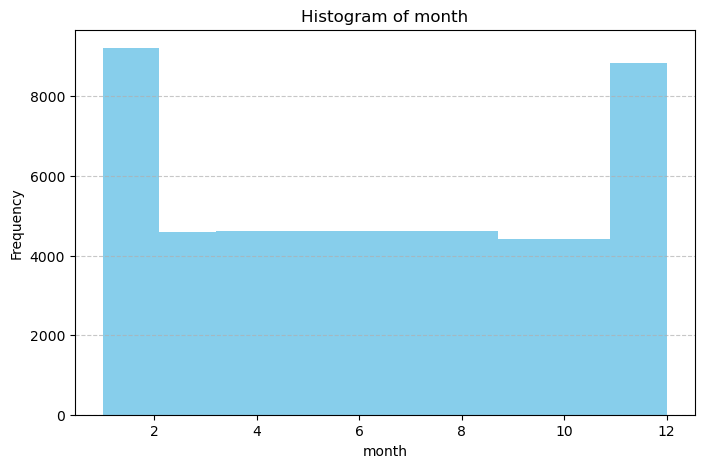

In [41]:
## Univariate Analysis- Histograms 

# First, we will start creating histograms for all numerical variables, now for the cities dataframe
# Getting the list of numerical column names
cities_numeric_columns = cities_df.select_dtypes(include=[int, float]).columns

# Create histograms for each numerical column
for column in nation_numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(cities_df[column], bins=10, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

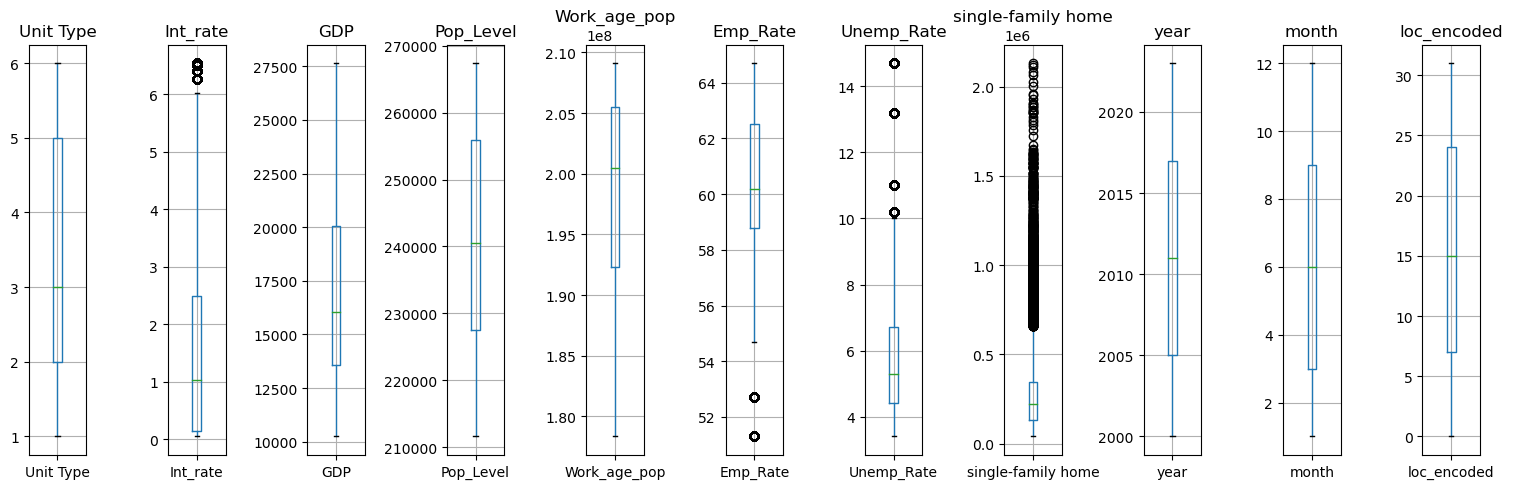

In [42]:
## Univariate Analysis- Box Plots
## Now, we will create box plots for all numerical varaibles in cities_df

# Creating subplots for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(cities_numeric_columns), figsize=(15, 5))

# Loop through numerical columns and create boxplots
for i, column in enumerate(cities_numeric_columns):
    ax = axes[i]
    cities_df.boxplot(column=column, ax=ax)
    ax.set_title(column)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

#### Observations: 

In [43]:
## Selecting target variable for next steps:

# Split the nation_df into features (X_n) and target variable (y_n)
X_c = cities_df.drop('single-family home', axis=1)
y_c = cities_df['single-family home']

print(X_c.info())
print(y_c)

<class 'pandas.core.frame.DataFrame'>
Index: 54509 entries, 1704 to 56231
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unit Type     54509 non-null  int64  
 1   Int_rate      54509 non-null  float64
 2   GDP           54509 non-null  float64
 3   Pop_Level     54509 non-null  int64  
 4   Work_age_pop  54509 non-null  float64
 5   Emp_Rate      54509 non-null  float64
 6   Unemp_Rate    54509 non-null  float64
 7   year          54509 non-null  int32  
 8   month         54509 non-null  int32  
 9   loc_encoded   54509 non-null  int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 4.0 MB
None
1704     129188.452183
1705     129784.886400
1706     130338.439231
1707     131478.340395
1708     132673.203125
             ...      
56227    220207.363469
56228    221964.606736
56229    224466.156434
56230    226990.577770
56231    229245.918843
Name: single-family home, Length: 54509, dtype: float64


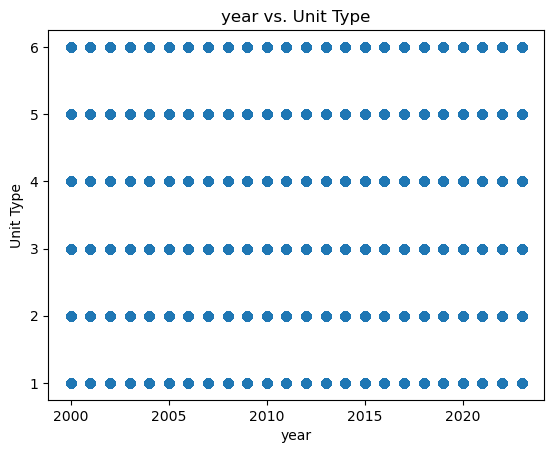

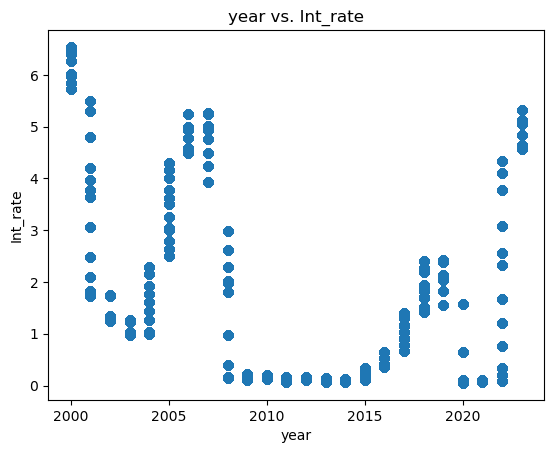

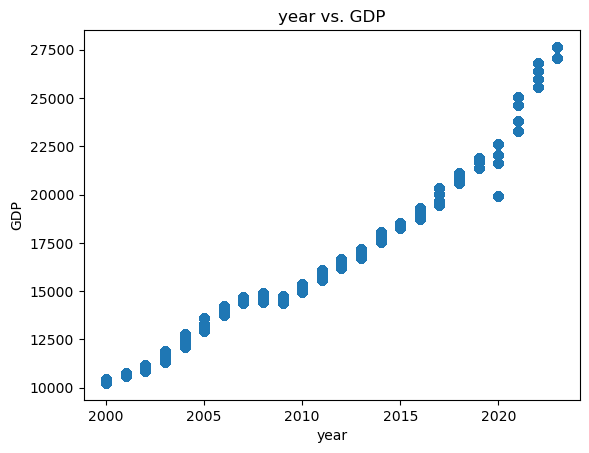

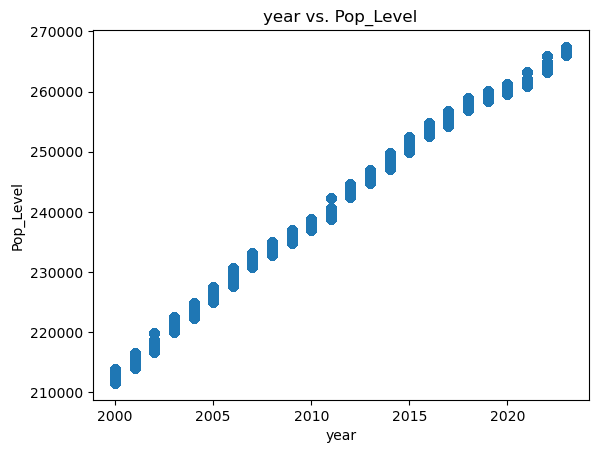

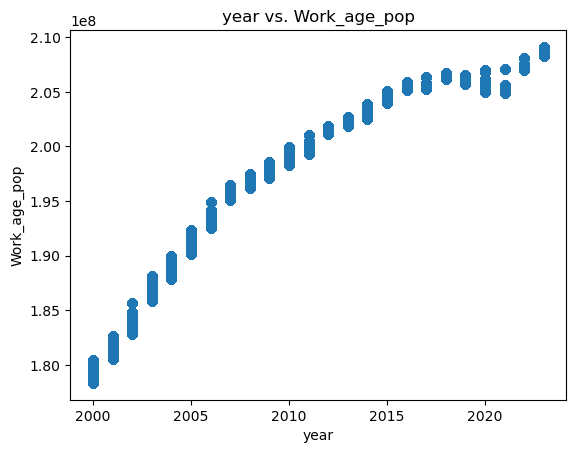

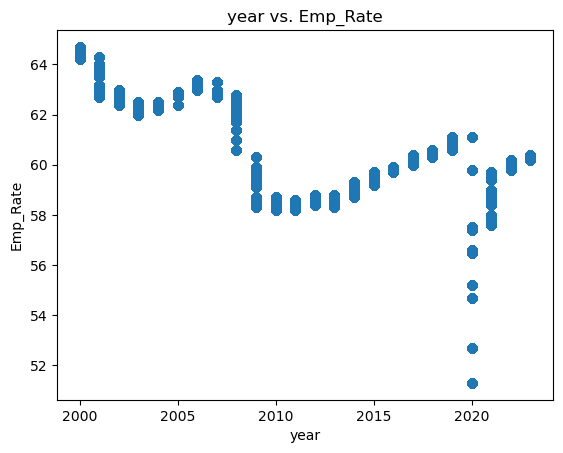

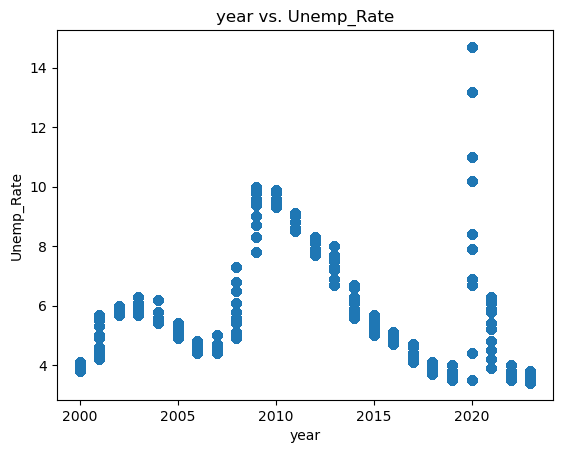

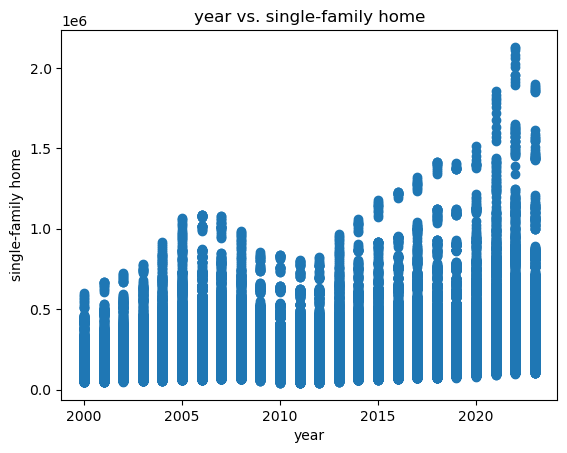

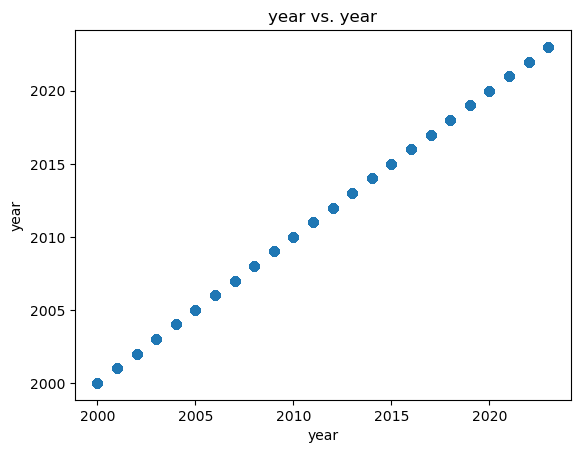

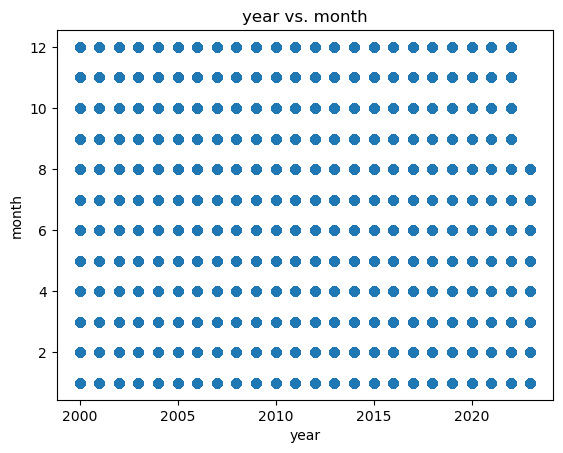

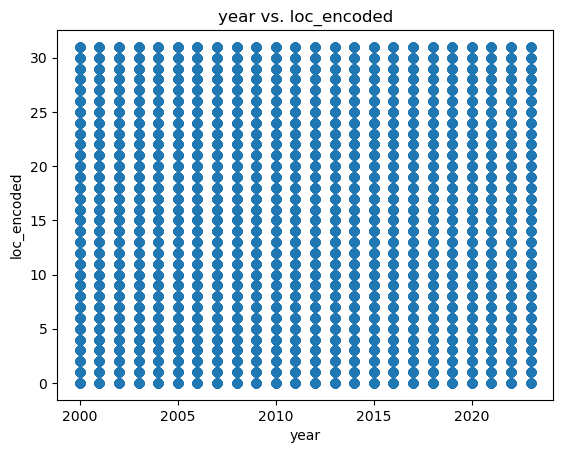

In [44]:
## Performing bivariate analysis:

# We will create scatter plots to observe all numerical values Vs the date

# Create scatter plots for each numerical column against the date
for column in cities_numeric_columns:
    plt.scatter(cities_df['year'], cities_df[column])
    plt.xlabel('year')
    plt.ylabel(column)
    plt.title(f'year vs. {column}')
    plt.show()

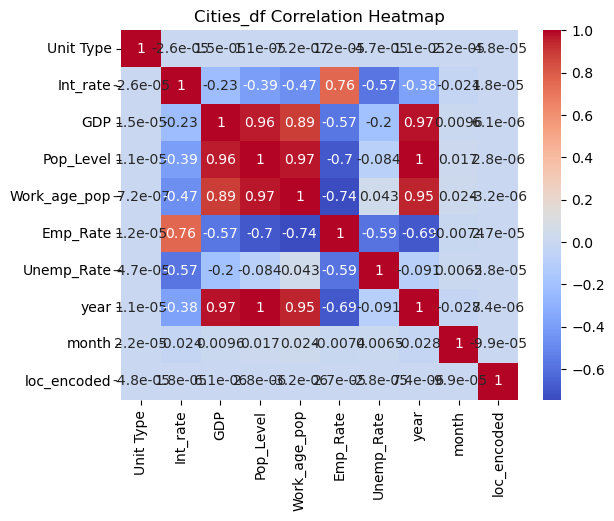

In [45]:
# now, we will perform a correlation matrix between the independent variables to see if there is any potentical colinearity
correlation_matrix_cities = X_c.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix_cities, annot=True, cmap='coolwarm')
plt.title('Cities_df Correlation Heatmap')
plt.show()

In [46]:
# Droppping columns to avoid colinearlity
cities_columns_to_drop = ['Work_age_pop', 'Emp_Rate', 'Pop_Level','year']

# Drop the specified columns
X_c.drop(columns=cities_columns_to_drop, inplace=True)

# Display the DataFrame after dropping the columns
print(X_c)

       Unit Type  Int_rate        GDP  Unemp_Rate  month  loc_encoded
1704           1      5.73  10247.720         4.0      1           17
1705           1      5.85  10247.720         4.1      2           17
1706           1      6.02  10247.720         4.0      3           17
1707           1      6.27  10318.165         3.8      4           17
1708           1      6.53  10318.165         4.0      5           17
...          ...       ...        ...         ...    ...          ...
56227          6      5.06  27644.463         3.4      4            7
56228          6      5.08  27644.463         3.7      5            7
56229          6      5.12  27644.463         3.6      6            7
56230          6      5.33  27644.463         3.5      7            7
56231          6      5.33  27644.463         3.8      8            7

[54509 rows x 6 columns]


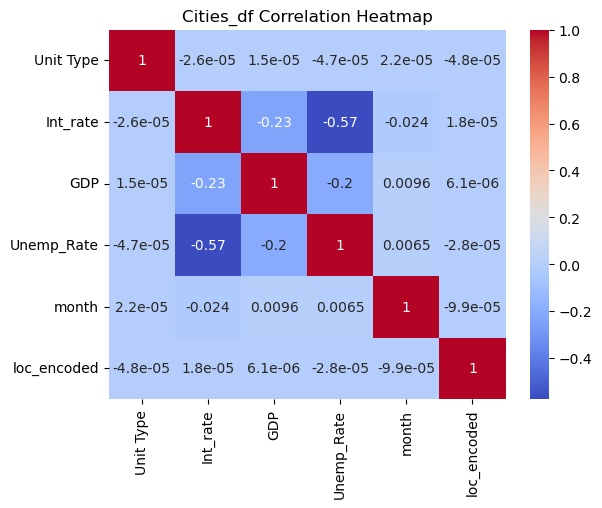

In [47]:
# now, we will perform a correlation matrix between the independent variables to see if there is any potentical colinearity
correlation_matrix_cities = X_c.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix_cities, annot=True, cmap='coolwarm')
plt.title('Cities_df Correlation Heatmap')
plt.show()

#### EDA Observations:
1. From the box plot, the dataset has some e=ouliers, specially when we are talking anout house prices
2. Some parameters follow a time series trend ( Insteres Rate, GDP, Unemploeyment rate, etc) which is to be expected due to the nature of the historic data
3. In the correlation matrix, highly correleated variables for the X ( idependent) variables for the analysis were dropped to avoid colinearity ( y variables)

### 3. Baseline Models

### 3.1 nation_df baseline models:

In [52]:
## Importing ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import time

In [53]:
# Train-test split for nation_df
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

In [54]:
# Linear Regression with Pipeline
lr_nation_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

In [55]:
# Ridge Regression with Pipeline
rd_nation_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_regression', Ridge())
])

In [56]:
# Lasso Regression with Pipeline
ls_nation_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_regression', Lasso())
])

In [57]:
# Elastic Regression with Pipeline
elar_nation_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_regression', ElasticNet())
])

In [58]:
# Decision Tree with Pipeline
dt_nation_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeRegressor(random_state=42))
])

In [59]:
# Random Forest with Pipeline
rf_nation_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(random_state=42))
])

In [60]:
# Random Forest with Pipeline
xgb_nation_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('XGBoost', XGBRegressor())
])

In [61]:
# SVM with Pipeline
svm_nation_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

In [62]:
# List of pipelines for iteration
model_nation = [
    ('Linear Regression', lr_nation_pipeline),
    ('Ridge Regression', rd_nation_pipeline),
    ('Lasso Regression', ls_nation_pipeline),
    ('Elastic Regression', elar_nation_pipeline),
    ('XGBoost', xgb_nation_pipeline),
    ('Decision Tree', dt_nation_pipeline),
    ('Random Forest', rf_nation_pipeline),
    ('SVM', svm_nation_pipeline)
]

In [100]:
# Evaluation models function. Kept for reference
# def evaluate_model(model, X_train, y_train, X_test, y_test):
#     start_time = time.time() # Record the start time
#     model.fit(X_train, y_train)
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
    
#     mse_train = mean_squared_error(y_train, y_pred_train)
#     mse_test = mean_squared_error(y_test, y_pred_test)
    
#     r2_train = r2_score(y_train, y_pred_train)
#     r2_test = r2_score(y_test, y_pred_test)
    
#     cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
#     end_time = time.time() # Record the end time
#     execution_time = end_time - start_time
    
    
#     print(f'\n{model_name}:')
#     print(f"Pipeline execution time: {execution_time:.4f} seconds")
#     print(f'Training MSE: {mse_train:.3f}, Testing MSE: {mse_test:.3f}')
#     print(f'Training R^2: {r2_train:.3f}, Testing R^2: {r2_test:.3f}')
#     print(f'Cross-validation Scores: {cv_scores}')
#     print(f'Mean CV Score: {np.mean(cv_scores)}')
#     print('-'*30)
#     return mse_train, mse_test, r2_train, r2_test, np.mean(cv_scores)

In [63]:
# Nation Models Baseline Evaluation
baseline_nation_metrics= {}

for model_name, model in model_nation:
    
    start_time = time.time() # Record the start time
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    end_time = time.time() # Record the end time
    execution_time = end_time - start_time
    
      
    baseline_nation_metrics[model_name] = {
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'Mean CV scores': np.mean(cv_scores),
        'Execution Time': execution_time
    
        
    }
    
    print(f'\n{model_name}:')
    print(f"Pipeline execution time: {execution_time:.4f} seconds")
    print(f'Training MSE: {mse_train:.3f}, Testing MSE: {mse_test:.3f}')
    print(f'Training R^2: {r2_train:.3f}, Testing R^2: {r2_test:.3f}')
    print(f'Cross-validation Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores)}')
    print('-'*30)


Linear Regression:
Pipeline execution time: 0.0259 seconds
Training MSE: 5799149884.892, Testing MSE: 5895238362.264
Training R^2: 0.531, Testing R^2: 0.569
Cross-validation Scores: [0.51391756 0.54872451 0.52211211 0.48879691 0.54264246]
Mean CV Score: 0.5232387095723793
------------------------------

Ridge Regression:
Pipeline execution time: 0.0293 seconds
Training MSE: 5799154668.605, Testing MSE: 5896224343.369
Training R^2: 0.531, Testing R^2: 0.568
Cross-validation Scores: [0.51393599 0.5487772  0.52214833 0.48891177 0.54250851]
Mean CV Score: 0.5232563608819628
------------------------------

Lasso Regression:
Pipeline execution time: 0.0160 seconds
Training MSE: 5799149889.575, Testing MSE: 5895268820.667
Training R^2: 0.531, Testing R^2: 0.569
Cross-validation Scores: [0.51391957 0.54872785 0.52211383 0.4888012  0.54264063]
Mean CV Score: 0.5232406138041081
------------------------------

Elastic Regression:
Pipeline execution time: 0.0257 seconds
Training MSE: 6558046792.1

<Axes: title={'center': 'Nation Baseline Models MSE comparison'}, xlabel='Model', ylabel='MSE'>

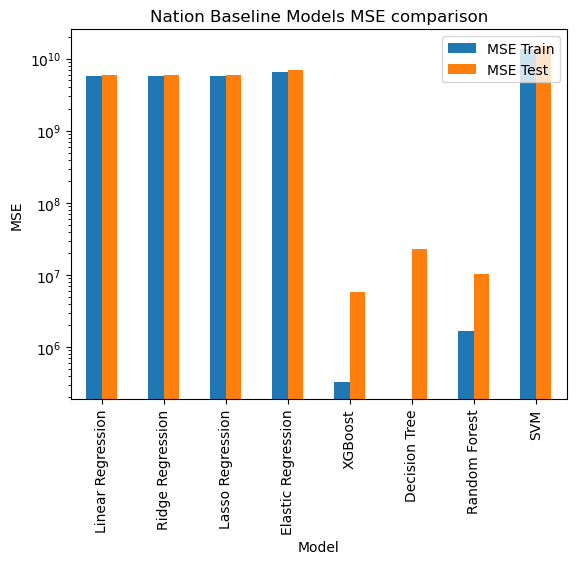

In [151]:
# Comparing visually model metrics- MSE
baseline_model_nation_df = pd.DataFrame(baseline_nation_metrics).transpose()
baseline_model_nation_df.plot(kind='bar',y=['MSE Train','MSE Test'],title='Nation Baseline Models MSE comparison',logy=True, xlabel= 'Model',ylabel='MSE')


<Axes: title={'center': 'Nation Baseline Models R2 comparison'}, xlabel='Model', ylabel='R2'>

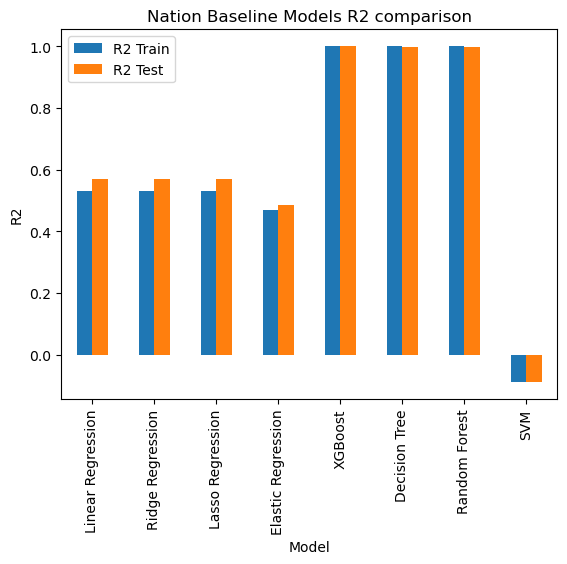

In [150]:
# Comparing visually model metrics- R2

baseline_model_nation_df.plot(kind='bar',y=['R2 Train','R2 Test'],title='Nation Baseline Models R2 comparison', xlabel= 'Model',ylabel='R2')


<Axes: title={'center': 'Nation Baseline Models Mean CV Score comparison'}, xlabel='Model', ylabel='MeanCV Score'>

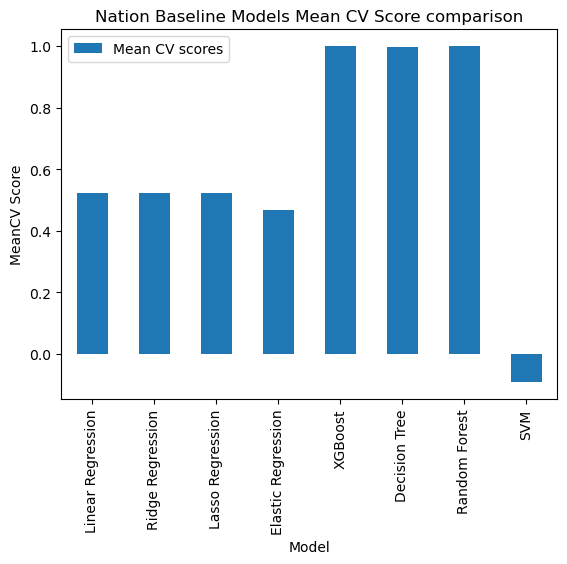

In [149]:
# Comparing visually model metrics- Mean CV SCore

baseline_model_nation_df.plot(kind='bar',y=['Mean CV scores'],title='Nation Baseline Models Mean CV Score comparison',xlabel= 'Model',ylabel='MeanCV Score')


<Axes: title={'center': 'Nation Baseline Models Execution Time comparison'}, xlabel='Model', ylabel='Seconds'>

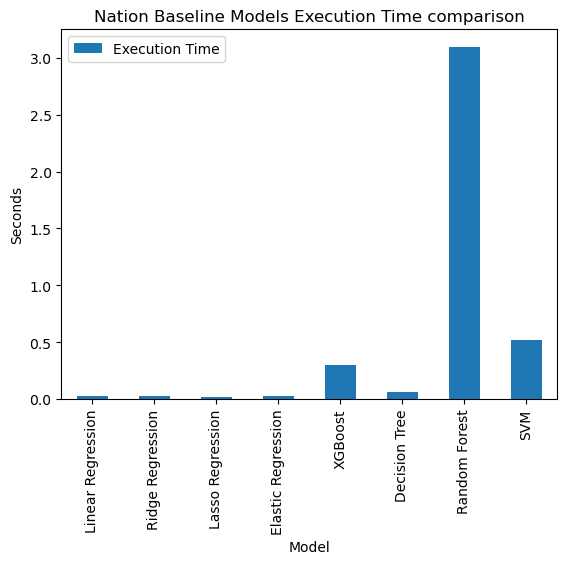

In [148]:
# Comparing visually model metrics- Execution Time

baseline_model_nation_df.plot(kind='bar',y=['Execution Time'],title='Nation Baseline Models Execution Time comparison', xlabel= 'Model',ylabel='Seconds')


### 3.2 nation_df tuned models:

 For hyperparameter tunning, we will remove SVM as it was the wort model and will try to improve all the regression and dt and rf models  

In [68]:
# Linear regression hyper parameter tuning
lg_params_nation = {
    'linear_regression__fit_intercept': [True, False]
}

tscv_lr = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on linear regression
grid_linear_nation = GridSearchCV(lr_nation_pipeline, param_grid=lg_params_nation, scoring='neg_mean_squared_error', cv=tscv_lr)
grid_linear_nation.fit(X_train, y_train)

# Get the best hyperparameters
best_params_lr_nation = grid_linear_nation.best_estimator_
print("Best Hyperparameters:", best_params_lr_nation)


Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])


In [69]:
# Ridge regression hyper parameter tuning

rd_params_nation = {
     'ridge_regression__alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'ridge_regression__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver for optimization
}

tscv_rd = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_rd_nation = GridSearchCV(rd_nation_pipeline, param_grid=rd_params_nation, scoring='neg_mean_squared_error', cv=tscv_rd)
grid_rd_nation.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rd_nation = grid_rd_nation.best_estimator_
print("Best Hyperparameters:", best_params_rd_nation)


Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge_regression', Ridge(alpha=0.1, solver='sag'))])


In [70]:
# Lasso regression hyper parameter tuning

ls_params_nation = {
    'lasso_regression__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'lasso_regression__fit_intercept': [True, False]
}

tscv_ls = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_ls_nation = GridSearchCV(ls_nation_pipeline, param_grid=ls_params_nation, scoring='neg_mean_squared_error', cv=tscv_ls)
grid_ls_nation.fit(X_train, y_train)

# Get the best hyperparameters
best_params_ls_nation = grid_ls_nation.best_estimator_
print("Best Hyperparameters:", best_params_ls_nation)

Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso_regression', Lasso(alpha=0.001))])


In [71]:
# Elastic Regression hyper parameter tuning

elar_params_nation = {
    'elastic_regression__alpha': [0.1, 0.5, 1.0],
    'elastic_regression__l1_ratio': [0.1, 0.5, 0.9]
}

tscv_elar = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_elar_nation = GridSearchCV(elar_nation_pipeline, param_grid=elar_params_nation, scoring='neg_mean_squared_error', cv=tscv_elar)
grid_elar_nation.fit(X_train, y_train)

# Get the best hyperparameters
best_params_elar_nation = grid_elar_nation.best_estimator_
print("Best Hyperparameters:", best_params_elar_nation)

Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic_regression', ElasticNet(alpha=0.1, l1_ratio=0.9))])


In [72]:
# Decision Tree hyperparameter tuning

dt_params_nation = {
    'decision_tree__max_depth': [3, 5, 7, 10],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 4]
}

tscv_dt = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_dt_nation = GridSearchCV(dt_nation_pipeline, param_grid=dt_params_nation, scoring='neg_mean_squared_error', cv=tscv_dt)
grid_dt_nation.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt_nation = grid_dt_nation.best_estimator_
print("Best Hyperparameters:", best_params_dt_nation)

Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree',
                 DecisionTreeRegressor(max_depth=10, random_state=42))])


In [73]:
# Random Forest hyperparameter tuning

rf_params_nation = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

tscv_rf = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_rf_nation = GridSearchCV(rf_nation_pipeline, param_grid=rf_params_nation, scoring='neg_mean_squared_error', cv=tscv_rf)
grid_rf_nation.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf_nation = grid_rf_nation.best_estimator_
print("Best Hyperparameters:", best_params_rf_nation)

Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest', RandomForestRegressor(random_state=42))])


In [74]:
# XGBoost hyper parameter tuning

xgb_params_nation = {
    'XGBoost__n_estimators': [100, 200, 300],
    'XGBoost__learning_rate': [0.01, 0.1, 0.2],
    'XGBoost__max_depth': [3, 4, 5],
    'XGBoost__subsample': [0.8, 0.9, 1.0],
    'XGBoost__colsample_bytree': [0.8, 0.9, 1.0],
    'XGBoost__reg_alpha': [0, 0.1, 0.5],
    'XGBoost__reg_lambda': [1, 1.5, 2]
}

tscv_xgb = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_xgb_nation = GridSearchCV(xgb_nation_pipeline, param_grid=xgb_params_nation, scoring='neg_mean_squared_error', cv=tscv_elar, verbose=1, n_jobs=-1)
grid_xgb_nation.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb_nation = grid_xgb_nation.best_estimator_
print("Best Hyperparameters:", best_params_xgb_nation)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monoton

In [75]:
# List of tuned pipelines for iteration
tuned_model_nation = [
    ('Linear Regression Tuned', best_params_lr_nation),
    ('Ridge Regression Tuned', best_params_rd_nation),
    ('Lasso Regression Tuned', best_params_ls_nation),
    ('Elastic Regression Tuned', best_params_elar_nation),
    ('DecisionTree Tuned', best_params_elar_nation),
    ('Random Forest Tuned', best_params_rf_nation),
    ('XGBoost Regression Tuned', best_params_xgb_nation)
    

]


In [80]:
# Nation Optimized Models Evaluation
tuned_nation_metrics= {}

for model_name, model in tuned_model_nation:
    
    start_time = time.time() # Record the start time
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    end_time = time.time() # Record the end time
    execution_time = end_time - start_time
    
      
    tuned_nation_metrics[model_name] = {
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'Mean CV scores': np.mean(cv_scores),
        'Execution Time': execution_time
    
        
    }
    
    print(f'\n{model_name}:')
    print(f"Pipeline execution time: {execution_time:.4f} seconds")
    print(f'Training MSE: {mse_train:.3f}, Testing MSE: {mse_test:.3f}')
    print(f'Training R^2: {r2_train:.3f}, Testing R^2: {r2_test:.3f}')
    print(f'Cross-validation Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores)}')
    print('-'*30)


Linear Regression Tuned:
Pipeline execution time: 0.0300 seconds
Training MSE: 5799149884.892, Testing MSE: 5895238362.264
Training R^2: 0.531, Testing R^2: 0.569
Cross-validation Scores: [0.51391756 0.54872451 0.52211211 0.48879691 0.54264246]
Mean CV Score: 0.5232387095723793
------------------------------

Ridge Regression Tuned:
Pipeline execution time: 0.0328 seconds
Training MSE: 5799149983.094, Testing MSE: 5895298354.036
Training R^2: 0.531, Testing R^2: 0.569
Cross-validation Scores: [0.51392667 0.54873027 0.52211212 0.48880022 0.54263167]
Mean CV Score: 0.523240189587842
------------------------------

Lasso Regression Tuned:
Pipeline execution time: 0.0156 seconds
Training MSE: 5799149884.892, Testing MSE: 5895238392.870
Training R^2: 0.531, Testing R^2: 0.569
Cross-validation Scores: [0.51391756 0.54872452 0.52211211 0.48879691 0.54264246]
Mean CV Score: 0.5232387114797682
------------------------------

Elastic Regression Tuned:
Pipeline execution time: 0.0160 seconds
Tra

<Axes: title={'center': 'Nation Tuned Models MSE comparison'}, xlabel='Model', ylabel='MSE'>

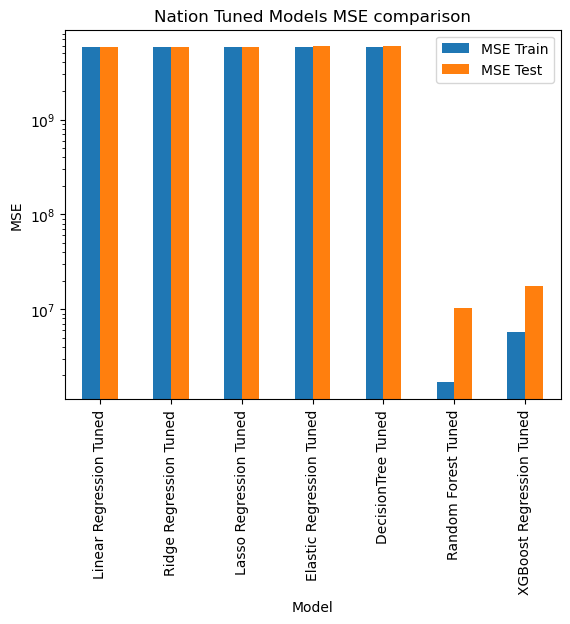

In [147]:
# Comparing visually model metrics- MSE
tuned_model_nation_df = pd.DataFrame(tuned_nation_metrics).transpose()
tuned_model_nation_df.plot(kind='bar',y=['MSE Train','MSE Test'],title='Nation Tuned Models MSE comparison',logy=True, xlabel= 'Model',ylabel='MSE')


<Axes: title={'center': 'Nation Tuned Models R2 comparison'}, xlabel='Model', ylabel='R2'>

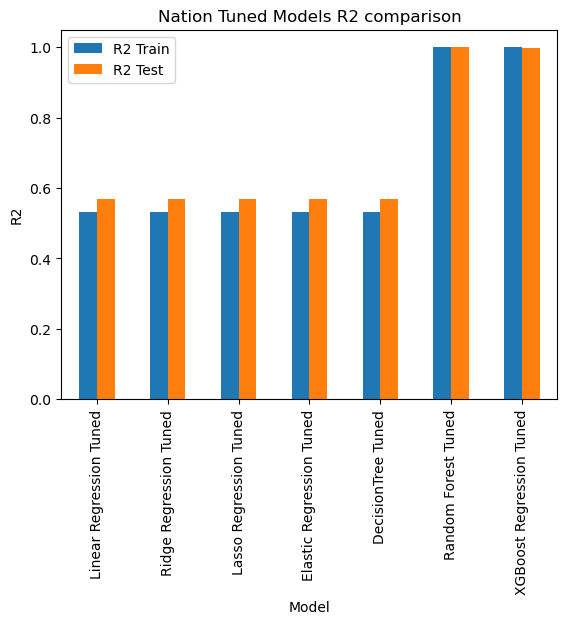

In [146]:
# Comparing visually model metrics- R2
tuned_model_nation_df.plot(kind='bar',y=['R2 Train','R2 Test'],title='Nation Tuned Models R2 comparison', xlabel= 'Model',ylabel='R2')


<Axes: title={'center': 'Nation Tuned Models Mean CV Score comparison'}, xlabel='Model', ylabel='Mean CV Score'>

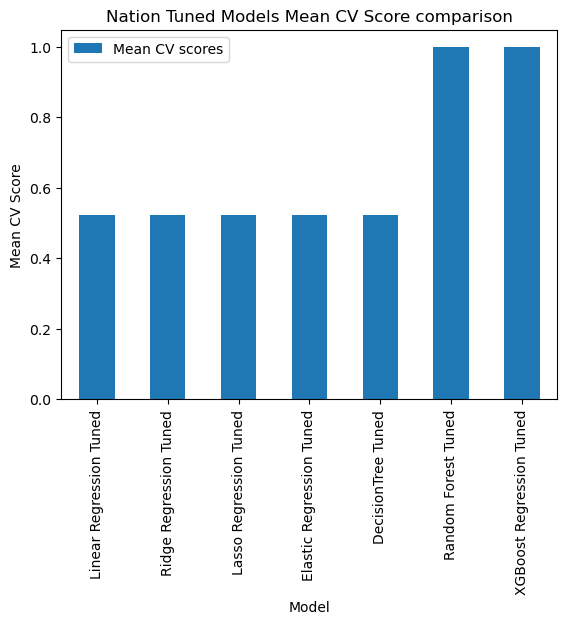

In [145]:
# Comparing visually model metrics- Mean CV SCore
tuned_model_nation_df.plot(kind='bar',y=['Mean CV scores'],title='Nation Tuned Models Mean CV Score comparison', xlabel= 'Model',ylabel='Mean CV Score')


<Axes: title={'center': 'Nation Tuned Models Execution Time comparison'}, xlabel='Model', ylabel='Seconds'>

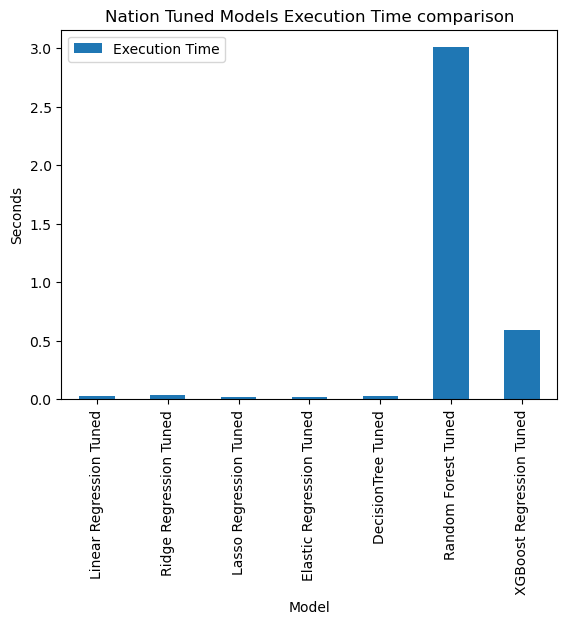

In [87]:
# Comparing visually model metrics- Execution Time
tuned_model_nation_df.plot(kind='bar',y=['Execution Time'],title='Nation Tuned Models Execution Time comparison', xlabel= 'Model',ylabel='Seconds')


#### Nation Dataset baseline and hyperparameter tuning Observations:
1. SVM was the worst model at the baseline, reason why it was moited in the Tuned section
2. MSE scores for linear metohds ( linear, lasso, ridge and elastic regression) is significantly high, even after hyperparameter tunning. random forest and decision trees tend to overfit. XGBoost is the one with best MSE fit ( smallest MSE) and the one that comparativeliys does not overfit significantively.
3. Besr R2 scores after tunning correspond to Random Forest and SGBoost as well as CV scores
4. Longest exetution times were for tuned Random Forest and XGBoost models  

In [152]:
### The comment section below was used to verify the parameters for each ML estimator
# # Get the parameter keys for the Ridge estimator in the pipeline
# param_keys = rd_nation_pipeline.named_steps['ridge_regression'].get_params().keys()

# # Print the parameter keys
# print(param_keys)

### 4.1 cities_df baseline models:

In [97]:
## ML libraries were imported in 3.1

# Train-test split for nation_df
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [98]:
# Linear Regression with Pipeline
lr_city_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

In [99]:
# Ridge Regression with Pipeline
rd_city_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge_regression', Ridge())
])

In [100]:
# Lasso Regression with Pipeline
ls_city_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso_regression', Lasso())
])

In [101]:
# Elastic Regression with Pipeline
elar_city_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic_regression', ElasticNet())
])

In [102]:
# Decision Tree with Pipeline
dt_city_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeRegressor(random_state=42))
])

In [103]:
# Random Forest with Pipeline
rf_city_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('random_forest', RandomForestRegressor(random_state=42))
])

In [104]:
# Random Forest with Pipeline
xgb_city_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('XGBoost', XGBRegressor())
])

In [105]:
# SVM with Pipeline
svm_city_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

In [106]:
# List of pipelines for iteration
model_city = [
    ('Linear Regression', lr_nation_pipeline),
    ('Ridge Regression', rd_nation_pipeline),
    ('Lasso Regression', ls_nation_pipeline),
    ('Elastic Regression', elar_nation_pipeline),
    ('XGBoost', xgb_nation_pipeline),
    ('Decision Tree', dt_nation_pipeline),
    ('Random Forest', rf_nation_pipeline),
    ('SVM', svm_nation_pipeline)
]

In [80]:
# # City Models Evaluation
# for model_name, model in model_city:
#     evaluate_model(model, X_train, y_train, X_test, y_test)


Linear Regression:
Pipeline execution time: 0.0731 seconds
Training MSE: 27600232652.191, Testing MSE: 26936165905.391
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535485 0.24387534 0.25601862 0.25257623 0.25961198]
Mean CV Score: 0.2534874047675915
------------------------------

Ridge Regression:
Pipeline execution time: 0.0517 seconds
Training MSE: 27600232658.604, Testing MSE: 26936159331.547
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535534 0.24387586 0.2560182  0.25257617 0.25961154]
Mean CV Score: 0.25348742278188197
------------------------------

Lasso Regression:
Pipeline execution time: 0.0785 seconds
Training MSE: 27600232657.883, Testing MSE: 26936157147.189
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535503 0.24387591 0.25601863 0.25257641 0.2596118 ]
Mean CV Score: 0.25348755805819007
------------------------------

Elastic Regression:
Pipeline execution time: 0.0715 seconds
Training MSE: 2865

In [107]:
# Cities Models Baseline Evaluation
baseline_city_metrics= {}

for model_name, model in model_city:
    
    start_time = time.time() # Record the start time
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    end_time = time.time() # Record the end time
    execution_time = end_time - start_time
    
      
    baseline_city_metrics[model_name] = {
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'Mean CV scores': np.mean(cv_scores),
        'Execution Time': execution_time
    
        
    }
    
    print(f'\n{model_name}:')
    print(f"Pipeline execution time: {execution_time:.4f} seconds")
    print(f'Training MSE: {mse_train:.3f}, Testing MSE: {mse_test:.3f}')
    print(f'Training R^2: {r2_train:.3f}, Testing R^2: {r2_test:.3f}')
    print(f'Cross-validation Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores)}')
    print('-'*30)


Linear Regression:
Pipeline execution time: 0.0679 seconds
Training MSE: 27600232652.191, Testing MSE: 26936165905.391
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535485 0.24387534 0.25601862 0.25257623 0.25961198]
Mean CV Score: 0.2534874047675915
------------------------------

Ridge Regression:
Pipeline execution time: 0.0509 seconds
Training MSE: 27600232658.604, Testing MSE: 26936159331.547
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535534 0.24387586 0.2560182  0.25257617 0.25961154]
Mean CV Score: 0.25348742278188197
------------------------------

Lasso Regression:
Pipeline execution time: 0.0630 seconds
Training MSE: 27600232657.883, Testing MSE: 26936157147.189
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535503 0.24387591 0.25601863 0.25257641 0.2596118 ]
Mean CV Score: 0.25348755805819007
------------------------------

Elastic Regression:
Pipeline execution time: 0.0469 seconds
Training MSE: 2865

<Axes: title={'center': 'City Baseline Models MSE comparison'}, xlabel='Model', ylabel='MSE'>

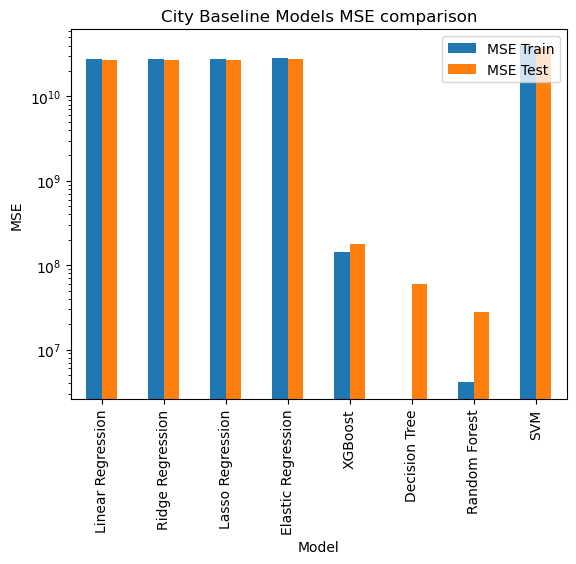

In [130]:
# Comparing visually model metrics- MSE
baseline_model_city_df = pd.DataFrame(baseline_city_metrics).transpose()
baseline_model_city_df.plot(kind='bar',y=['MSE Train','MSE Test'],title='City Baseline Models MSE comparison',logy=True, xlabel= 'Model',ylabel='MSE')


<Axes: title={'center': 'City Baseline Models R2 comparison'}, xlabel='Model', ylabel='R2'>

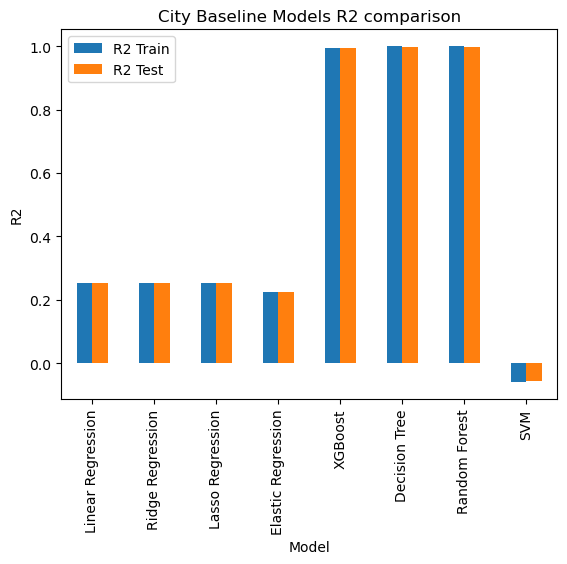

In [131]:
# Comparing visually model metrics- R2
baseline_model_city_df.plot(kind='bar',y=['R2 Train','R2 Test'],title='City Baseline Models R2 comparison', xlabel= 'Model',ylabel='R2')


<Axes: title={'center': 'City Baseline Models Mean CV Score comparison'}, xlabel='Model', ylabel='MeanCV Score'>

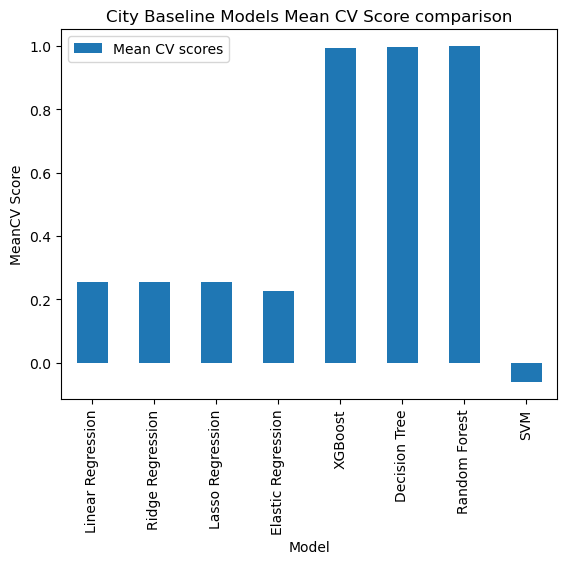

In [132]:
# Comparing visually model metrics- Mean CV SCore
baseline_model_city_df.plot(kind='bar',y=['Mean CV scores'],title='City Baseline Models Mean CV Score comparison',xlabel= 'Model',ylabel='MeanCV Score')


<Axes: title={'center': 'City Baseline Models Execution Time comparison'}, xlabel='Model', ylabel='Seconds'>

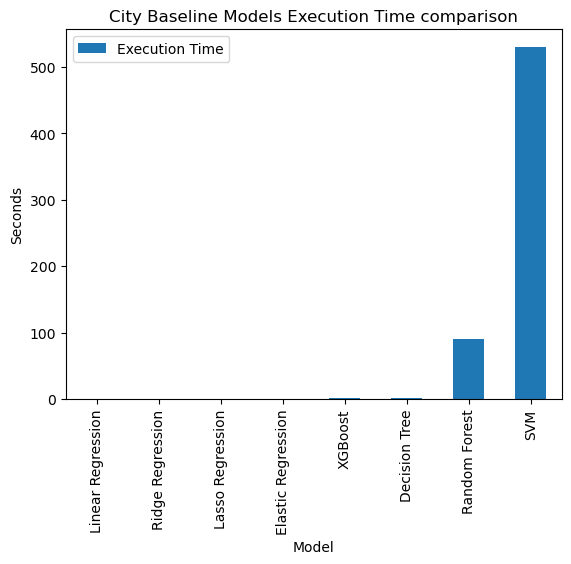

In [133]:
# Comparing visually model metrics- Execution Time

baseline_model_city_df.plot(kind='bar',y=['Execution Time'],title='City Baseline Models Execution Time comparison', xlabel= 'Model',ylabel='Seconds')


### 4.2. Cities_df tuned models:

 For hyperparameter tunning, we will remove SVM as it was the wort model and will try to improve all the regression and dt and rf models  

In [112]:
# Linear regression hyper parameter tuning
lg_params_city = {
    'linear_regression__fit_intercept': [True, False]
}

tscv_lr = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on linear regression
grid_linear_city = GridSearchCV(lr_city_pipeline, param_grid=lg_params_city, scoring='neg_mean_squared_error', cv=tscv_lr)
grid_linear_city.fit(X_train, y_train)

# Get the best hyperparameters
best_params_lr_city = grid_linear_city.best_estimator_
print("Best Hyperparameters:", best_params_lr_city)


Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])


In [113]:
# Ridge regression hyper parameter tuning

rd_params_city = {
     'ridge_regression__alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'ridge_regression__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver for optimization
}

tscv_rd = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_rd_city = GridSearchCV(rd_city_pipeline, param_grid=rd_params_city, scoring='neg_mean_squared_error', cv=tscv_rd)
grid_rd_city.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rd_city = grid_rd_city.best_estimator_
print("Best Hyperparameters:", best_params_rd_city)


Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge_regression', Ridge(solver='saga'))])


In [114]:
# Lasso regression hyper parameter tuning

ls_params_city = {
    'lasso_regression__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'lasso_regression__fit_intercept': [True, False]
}

tscv_ls = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_ls_city = GridSearchCV(ls_city_pipeline, param_grid=ls_params_city, scoring='neg_mean_squared_error', cv=tscv_ls)
grid_ls_city.fit(X_train, y_train)

# Get the best hyperparameters
best_params_ls_city = grid_ls_city.best_estimator_
print("Best Hyperparameters:", best_params_ls_city)

Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso_regression', Lasso(alpha=0.001))])


In [115]:
# Elastic Regression hyper parameter tuning

elar_params_city = {
    'elastic_regression__alpha': [0.1, 0.5, 1.0],
    'elastic_regression__l1_ratio': [0.1, 0.5, 0.9]
}

tscv_elar = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_elar_city = GridSearchCV(elar_city_pipeline, param_grid=elar_params_city, scoring='neg_mean_squared_error', cv=tscv_elar)
grid_elar_city.fit(X_train, y_train)

# Get the best hyperparameters
best_params_elar_city = grid_elar_city.best_estimator_
print("Best Hyperparameters:", best_params_elar_city)

Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic_regression', ElasticNet(alpha=0.1, l1_ratio=0.9))])


In [116]:
# Decision Tree hyperparameter tuning

dt_params_city = {
    'decision_tree__max_depth': [3, 5, 7, 10],
    'decision_tree__min_samples_split': [2, 5, 10],
    'decision_tree__min_samples_leaf': [1, 2, 4]
}

tscv_dt = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_dt_city = GridSearchCV(dt_city_pipeline, param_grid=dt_params_city, scoring='neg_mean_squared_error', cv=tscv_dt)
grid_dt_city.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt_city = grid_dt_city.best_estimator_
print("Best Hyperparameters:", best_params_dt_city)

Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=5, random_state=42))])


In [117]:
# Random Forest hyperparameter tuning

rf_params_city = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20, 30],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

tscv_rf = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_rf_city = GridSearchCV(rf_city_pipeline, param_grid=rf_params_city, scoring='neg_mean_squared_error', cv=tscv_rf)
grid_rf_city.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf_city = grid_rf_city.best_estimator_
print("Best Hyperparameters:", best_params_rf_city)

Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 RandomForestRegressor(n_estimators=200, random_state=42))])


In [118]:
# XGBoost hyper parameter tuning

xgb_params_city = {
    'XGBoost__n_estimators': [100, 200, 300],
    'XGBoost__learning_rate': [0.01, 0.1, 0.2],
    'XGBoost__max_depth': [3, 4, 5],
    'XGBoost__subsample': [0.8, 0.9, 1.0],
    'XGBoost__colsample_bytree': [0.8, 0.9, 1.0],
    'XGBoost__reg_alpha': [0, 0.1, 0.5],
    'XGBoost__reg_lambda': [1, 1.5, 2]
}

tscv_xgb = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Perform GridSearchCV for hyperparameter tuning on ridge regression
grid_xgb_city = GridSearchCV(xgb_city_pipeline, param_grid=xgb_params_city, scoring='neg_mean_squared_error', cv=tscv_elar, verbose=1, n_jobs=-1)
grid_xgb_city.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb_city = grid_xgb_city.best_estimator_
print("Best Hyperparameters:", best_params_xgb_city)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBoost',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=1.0, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monoton

In [121]:
# List of tuned pipelines for iteration
tuned_model_city = [
    ('Linear Regression Tuned', best_params_lr_city),
    ('Ridge Regression Tuned', best_params_rd_city),
    ('Lasso Regression Tuned', best_params_ls_city),
    ('Elastic Regression Tuned', best_params_elar_city),
    ('DecisionTree Tuned', best_params_elar_city),
    ('Random Forest Tuned', best_params_rf_city),
    ('XGBoost Regression Tuned', best_params_xgb_city)
    

]


In [122]:
# for model_name, model in tuned_model_city:
#     evaluate_model(model, X_train, y_train, X_test, y_test)

In [123]:
# Cities Models Baseline Evaluation
tuned_city_metrics= {}

for model_name, model in tuned_model_city:
    
    start_time = time.time() # Record the start time
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    end_time = time.time() # Record the end time
    execution_time = end_time - start_time
    
      
    tuned_city_metrics[model_name] = {
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'Mean CV scores': np.mean(cv_scores),
        'Execution Time': execution_time
    
        
    }
    
    print(f'\n{model_name}:')
    print(f"Pipeline execution time: {execution_time:.4f} seconds")
    print(f'Training MSE: {mse_train:.3f}, Testing MSE: {mse_test:.3f}')
    print(f'Training R^2: {r2_train:.3f}, Testing R^2: {r2_test:.3f}')
    print(f'Cross-validation Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores)}')
    print('-'*30)


Linear Regression Tuned:
Pipeline execution time: 0.0612 seconds
Training MSE: 27600232652.191, Testing MSE: 26936165905.391
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535485 0.24387534 0.25601862 0.25257623 0.25961198]
Mean CV Score: 0.2534874047675915
------------------------------

Ridge Regression Tuned:
Pipeline execution time: 0.3577 seconds
Training MSE: 27600232658.336, Testing MSE: 26936161702.965
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535542 0.24387604 0.25601805 0.25257565 0.25961182]
Mean CV Score: 0.2534873960658194
------------------------------

Lasso Regression Tuned:
Pipeline execution time: 0.0650 seconds
Training MSE: 27600232652.191, Testing MSE: 26936165896.625
Training R^2: 0.254, Testing R^2: 0.252
Cross-validation Scores: [0.25535485 0.24387534 0.25601862 0.25257623 0.25961198]
Mean CV Score: 0.2534874049221946
------------------------------

Elastic Regression Tuned:
Pipeline execution time: 0.0629 seco

<Axes: title={'center': 'City Tuned Models MSE comparison'}, xlabel='Model', ylabel='MSE'>

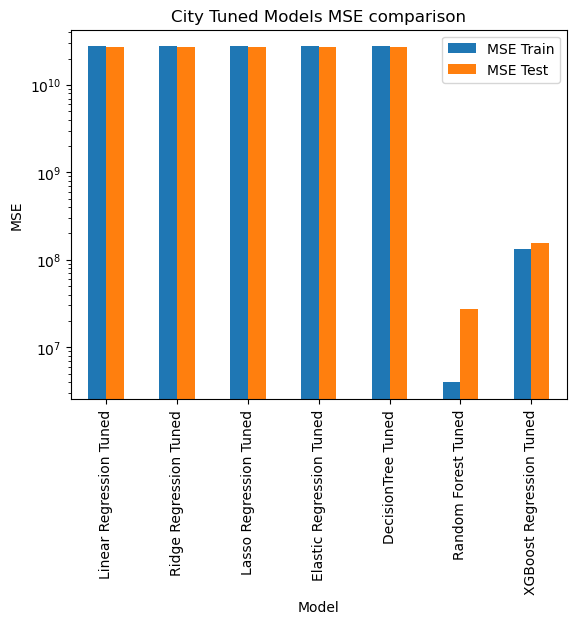

In [134]:
# Comparing visually model metrics- MSE
tuned_model_city_df = pd.DataFrame(tuned_city_metrics).transpose()
tuned_model_city_df.plot(kind='bar',y=['MSE Train','MSE Test'],title='City Tuned Models MSE comparison',logy=True, xlabel= 'Model',ylabel='MSE')


<Axes: title={'center': 'City Tuned Models R2 comparison'}, xlabel='Model', ylabel='R2'>

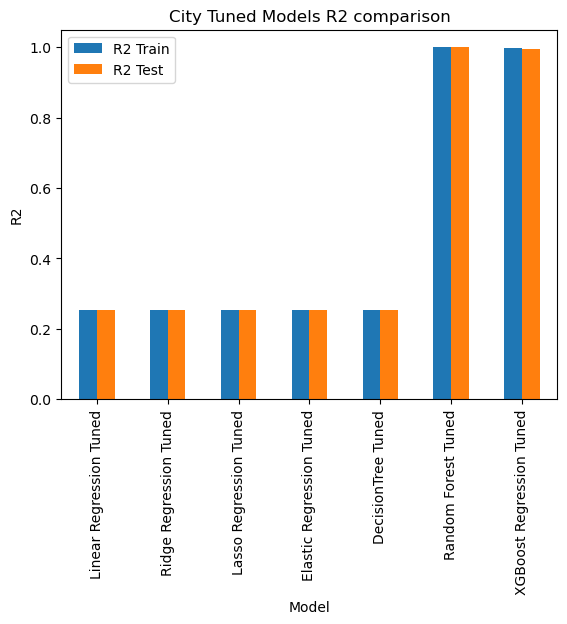

In [135]:
# Comparing visually model metrics- R2
tuned_model_city_df.plot(kind='bar',y=['R2 Train','R2 Test'],title='City Tuned Models R2 comparison', xlabel= 'Model',ylabel='R2')


<Axes: title={'center': 'City Tuned Models Mean CV Score comparison'}, xlabel='Model', ylabel='MeanCV Score'>

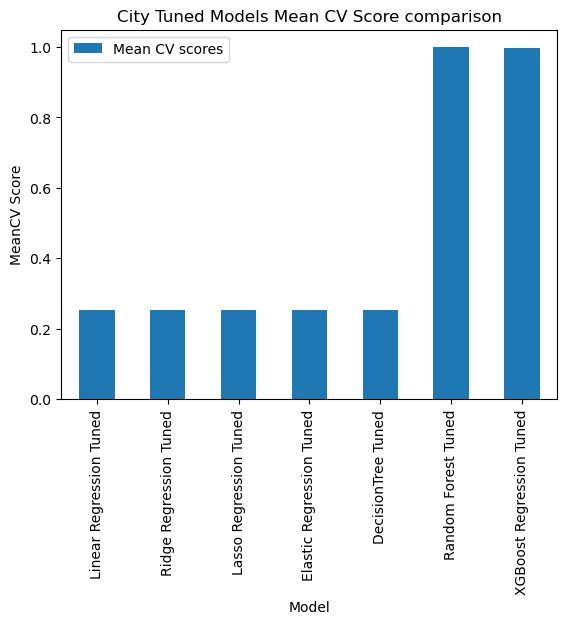

In [136]:
# Comparing visually model metrics- Mean CV SCore
tuned_model_city_df.plot(kind='bar',y=['Mean CV scores'],title='City Tuned Models Mean CV Score comparison',xlabel= 'Model',ylabel='MeanCV Score')


<Axes: title={'center': 'City Tuned Models Execution Time comparison'}, xlabel='Model', ylabel='Seconds'>

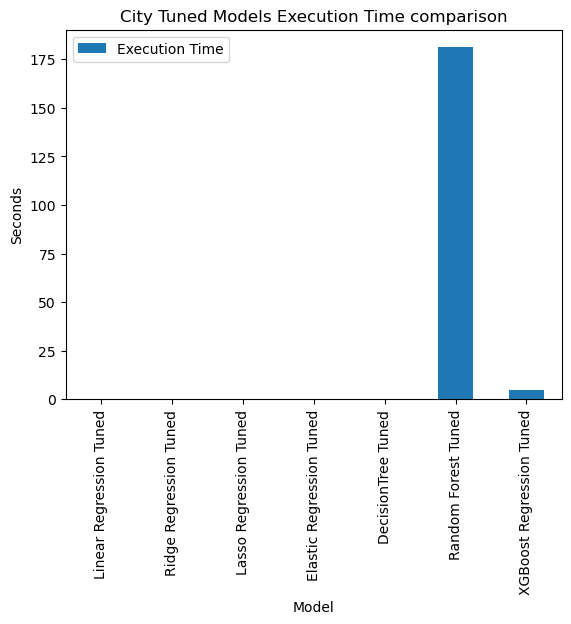

In [137]:
# Comparing visually model metrics- Execution Time

tuned_model_city_df.plot(kind='bar',y=['Execution Time'],title='City Tuned Models Execution Time comparison', xlabel= 'Model',ylabel='Seconds')


#### City Dataset baseline and hyperparameter tuning Observations:
Results for the city data frame were the similar to nation dataframe:
1. SVM was the worst model at the baseline, reason why it was moited in the Tuned section
2. MSE scores for linear metohds ( linear, lasso, ridge and elastic regression) is significantly high, even after hyperparameter tunning, it performed overfitted less than in the nation dataframe but the MSE score was higher. random forest and decision trees tend to overfit. XGBoost is the one with best MSE fit ( smallest MSE) and the one that comparativeliys does not overfit significantively.
3. Best R2 scores after tunning correspond to Random Forest and SGBoost as well as CV scores
4. Longest exetution times were for tuned Random Forest 

#### Models Analysis Conclusion:

The metrics indicate that the best model we can use for the data gathered is XGBoost. Therefore, we will continue to create the app by donloading the trained model using joblib and streamlit

### 5.1. Downloading best model for Nation to Create APP:

In [166]:
# Importing joblib to save XGBoost model with joblib. ANd recalling data for Test and Train for Nation
import joblib
# Train-test split for nation_df
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

In [167]:
## Training tuned XGBoost for nation from 3.2 section

xgb_model_nation= best_params_xgb_nation.fit(X_train,y_train)

In [169]:
# Saving the model
joblib.dump(xgb_model_nation, 'nation_xgb_model.joblib')

['nation_xgb_model.joblib']

### 5.2. Downloading best model for Cities to Create APP:

In [170]:
# Importing joblib to save XGBoost model with joblib. ANd recalling data for Test and Train for Nation
import joblib
# Train-test split for nation_df
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)

In [171]:
## Training tuned XGBoost for nation from 3.2 section

xgb_model_city=best_params_xgb_city.fit(X_train,y_train)

In [172]:
# Saving the model
joblib.dump(xgb_model_city, 'city_xgb_model.joblib')

['city_xgb_model.joblib']